# Input Pattern Overview 🔍

This file demonstrates various possible (random) input patterns (per seed), using the **Seasonal Input Generator**. They vary both in length and type of pattern.

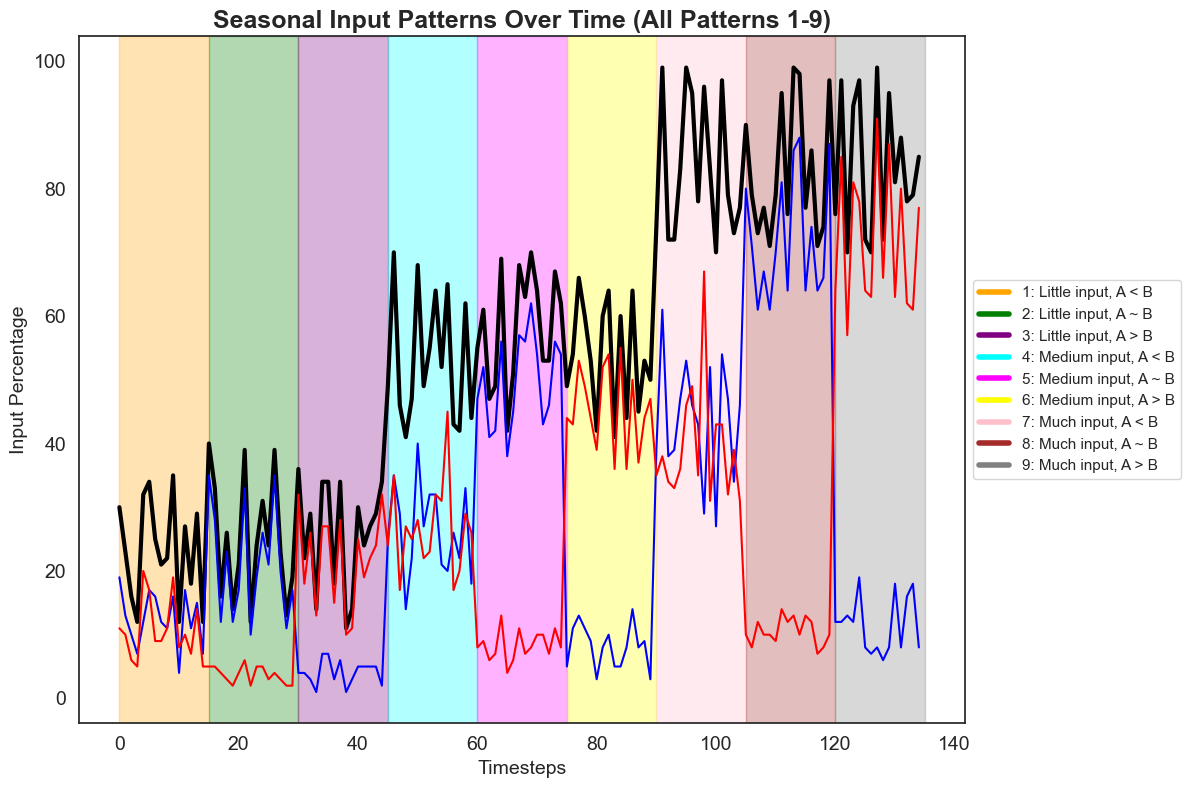

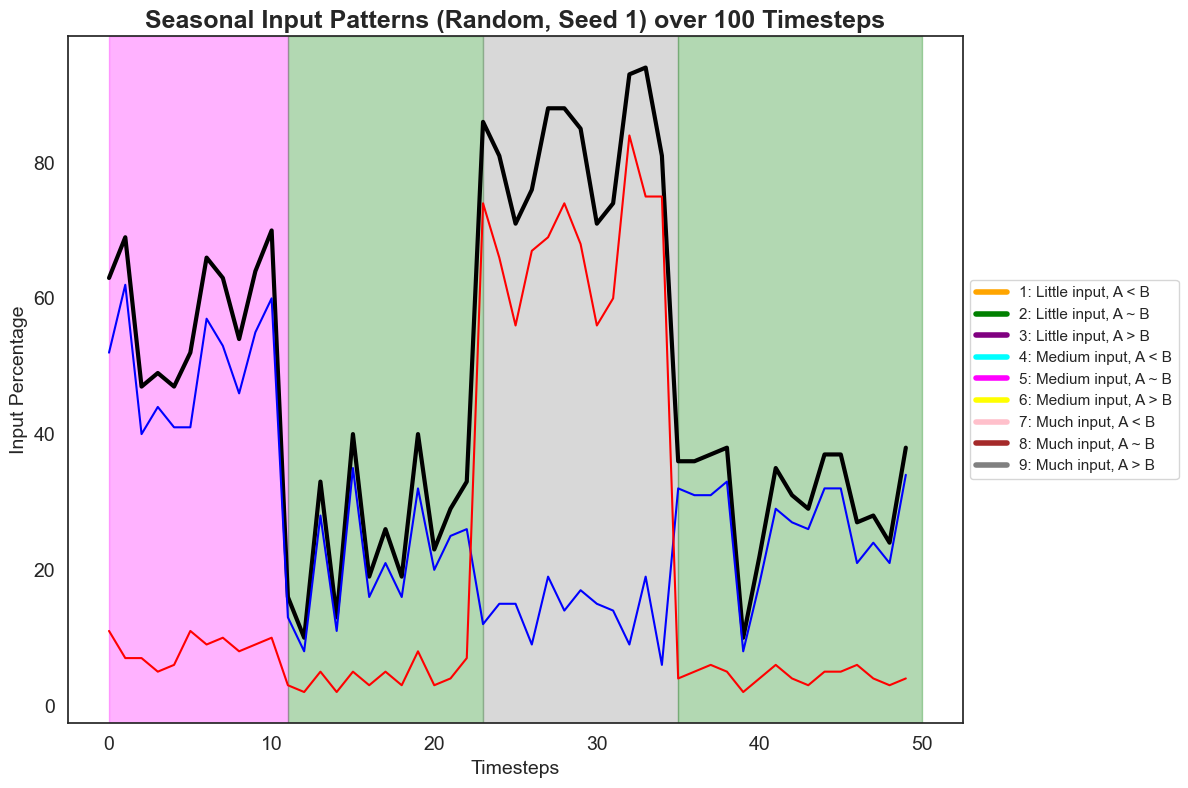

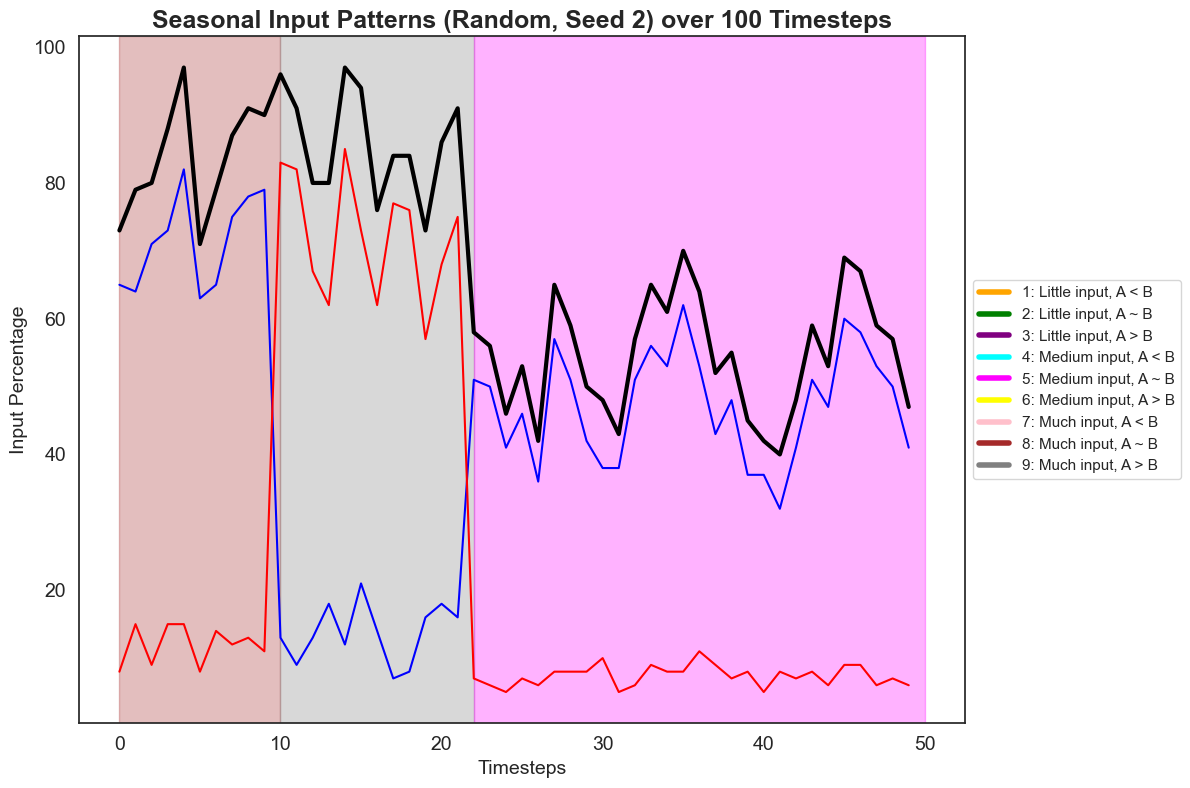

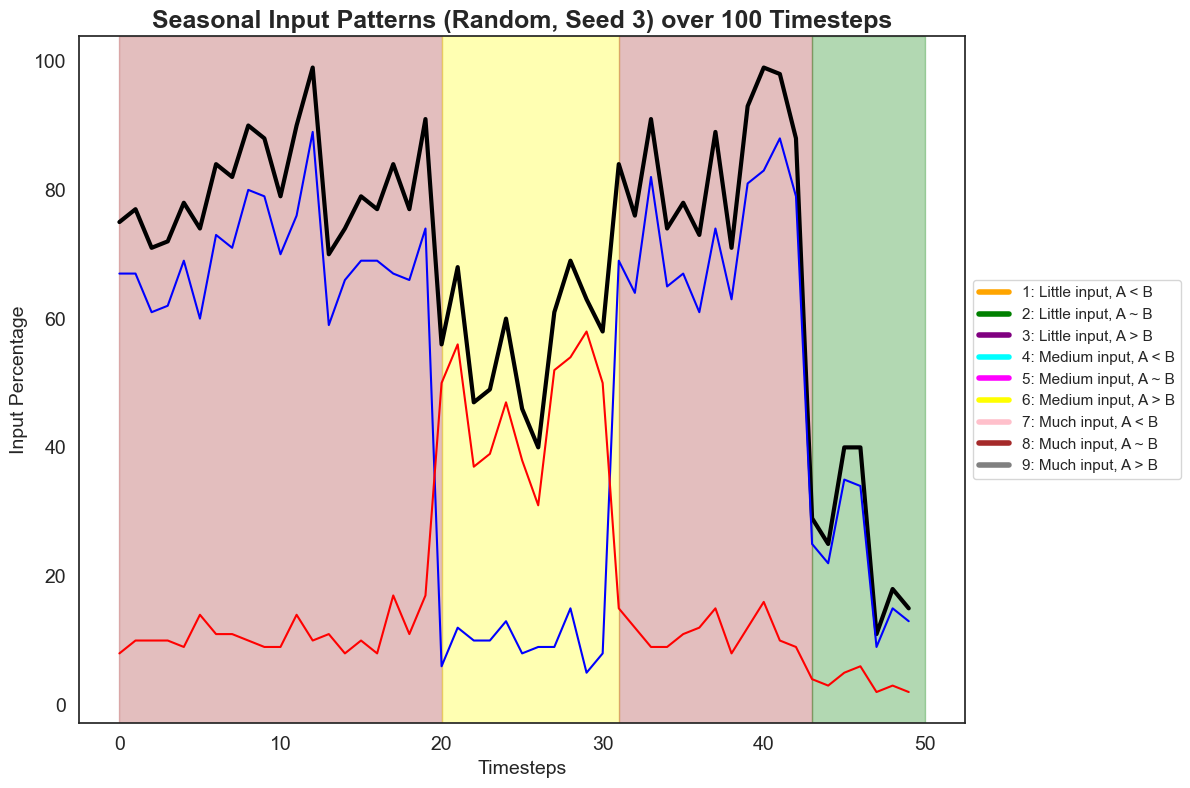

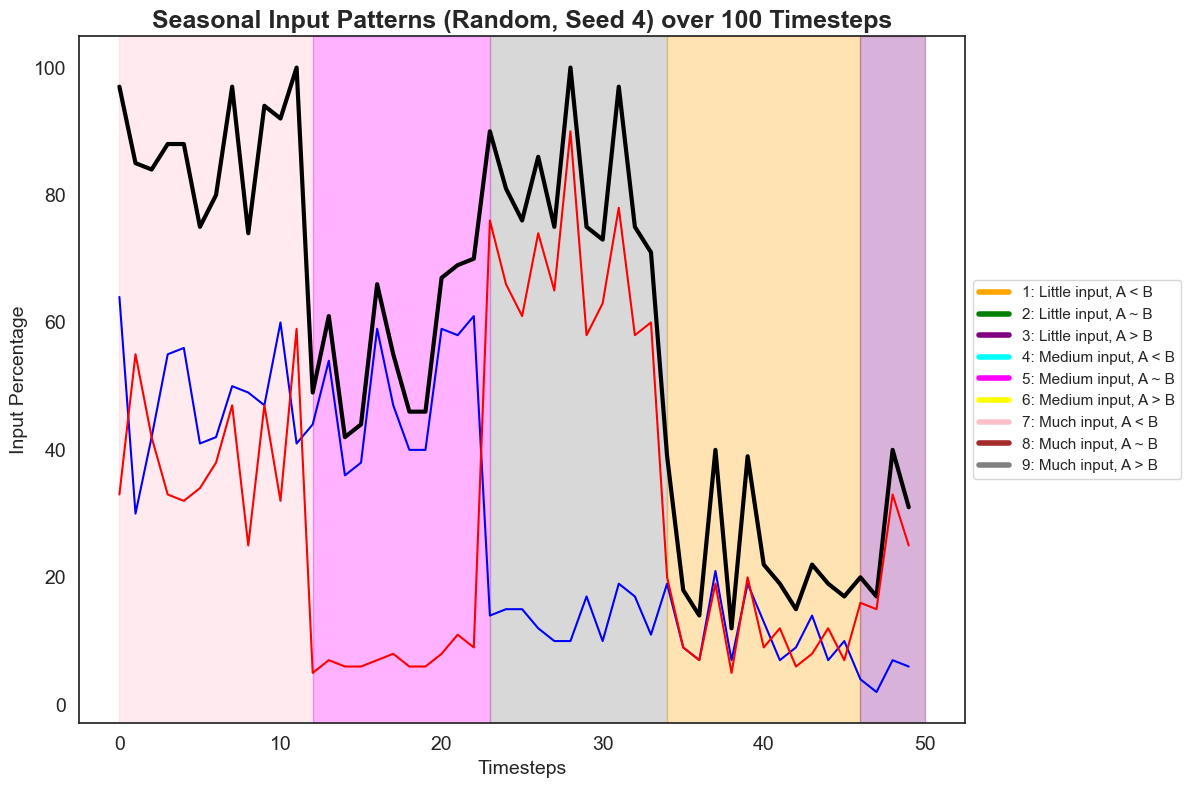

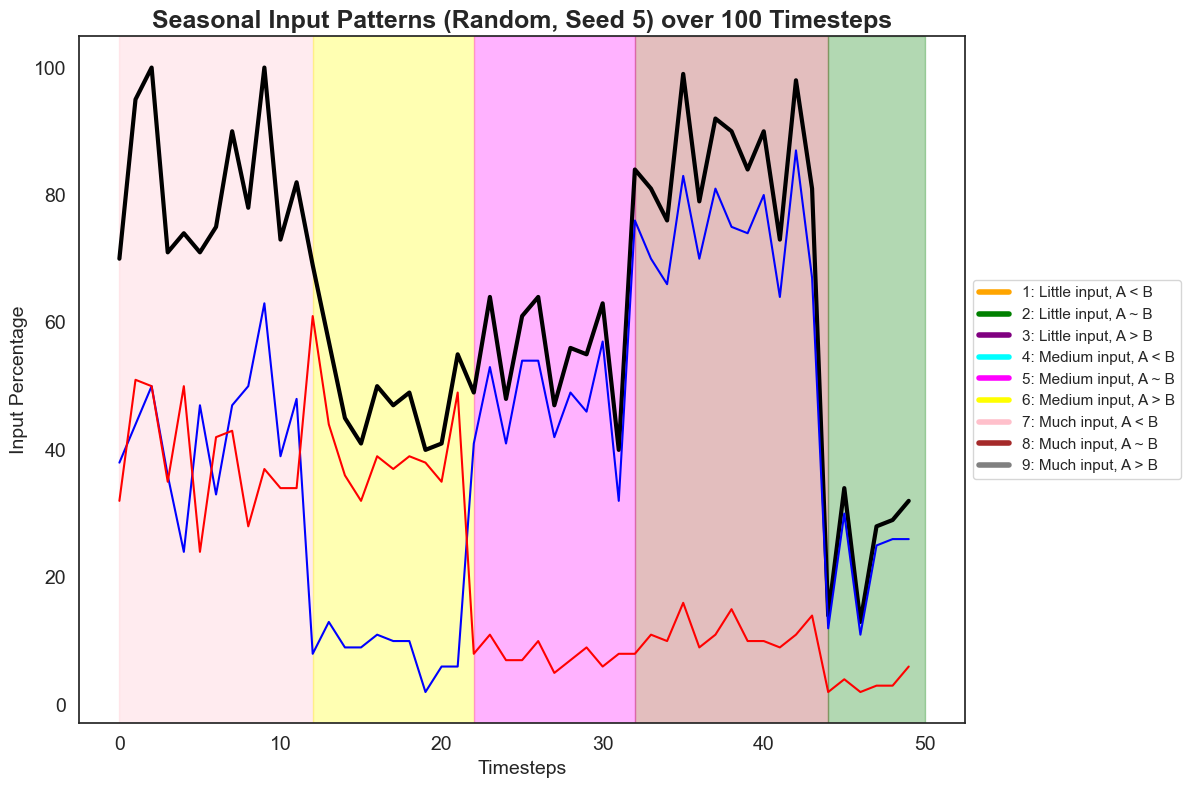

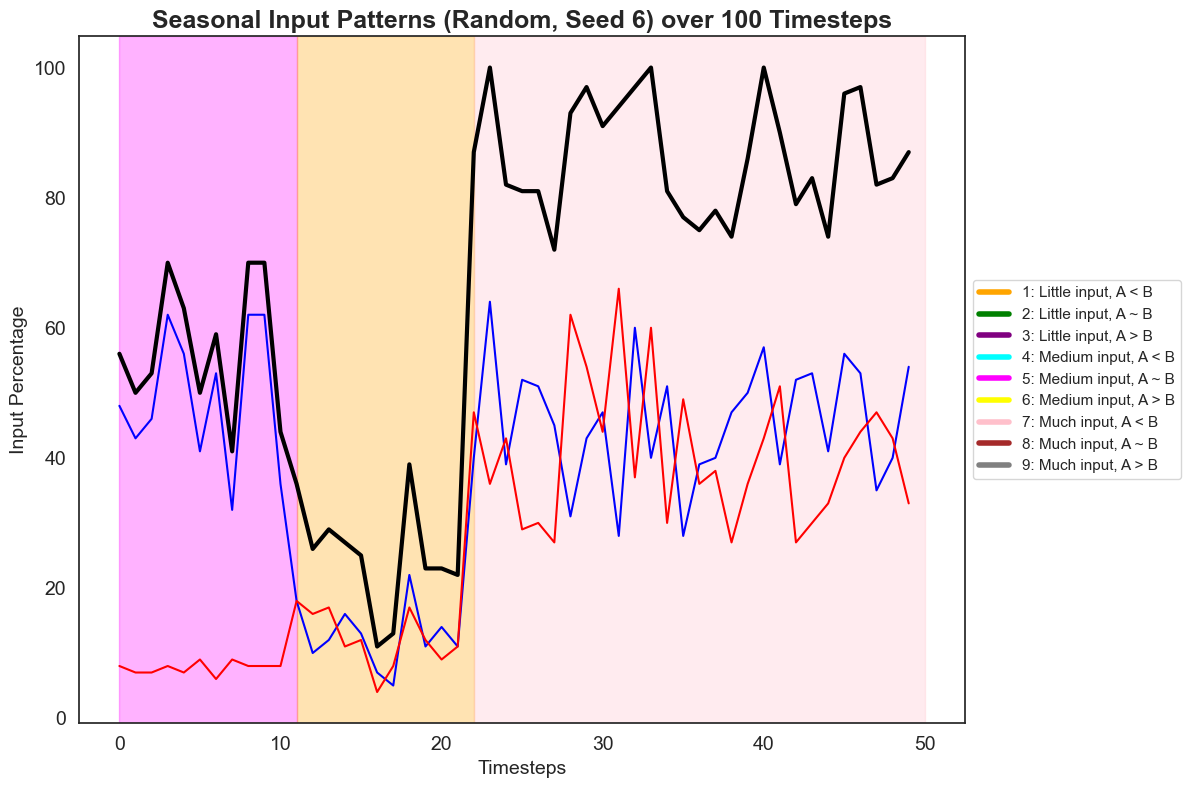

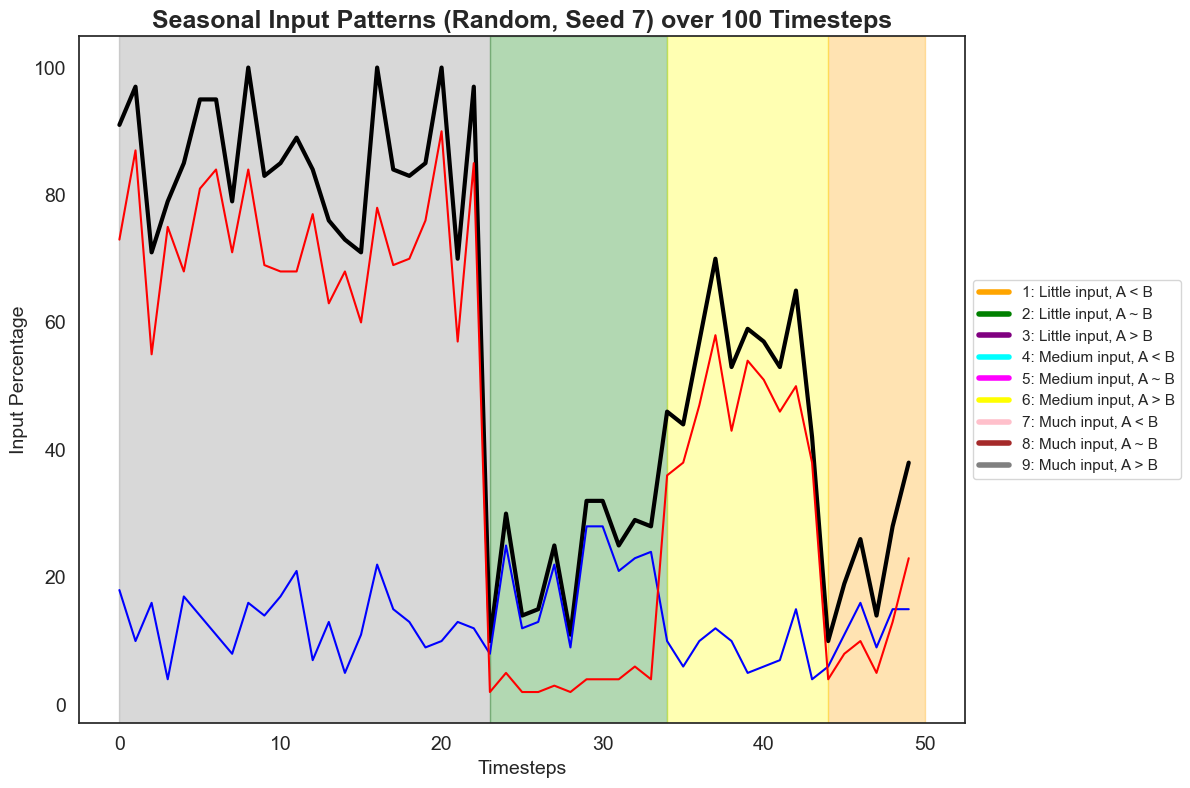

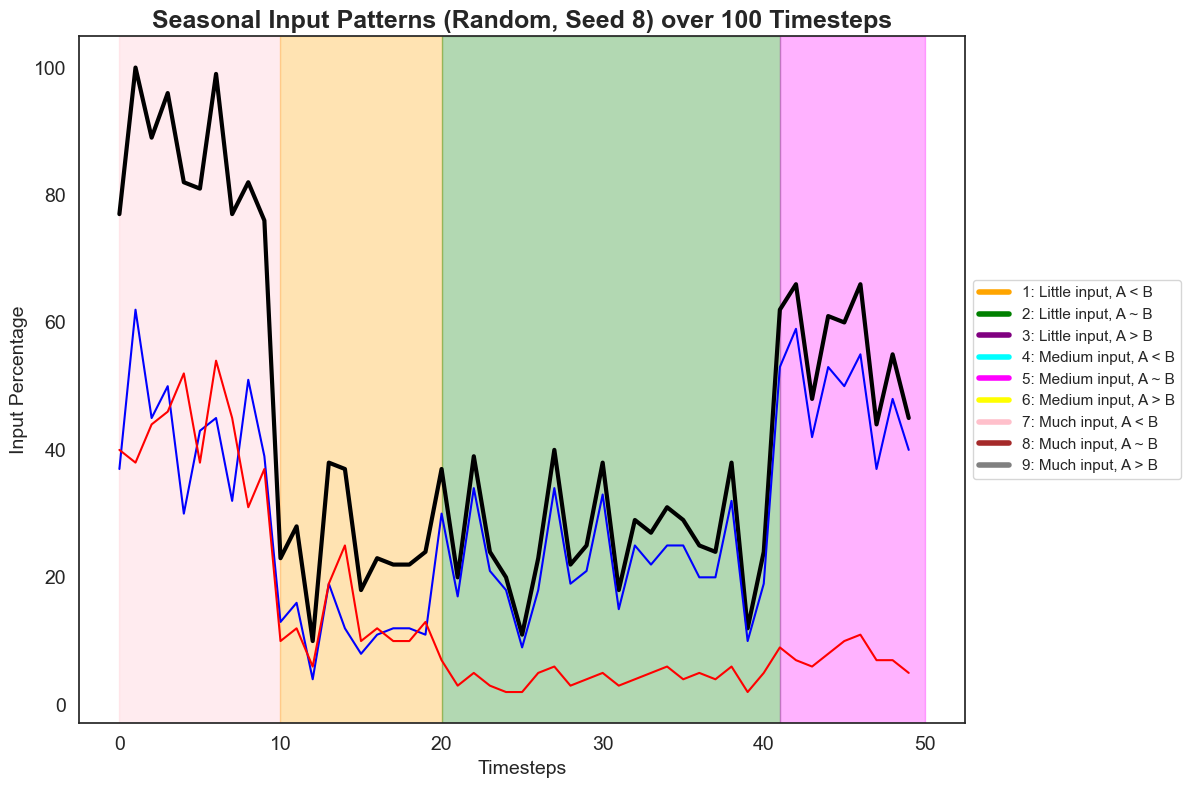

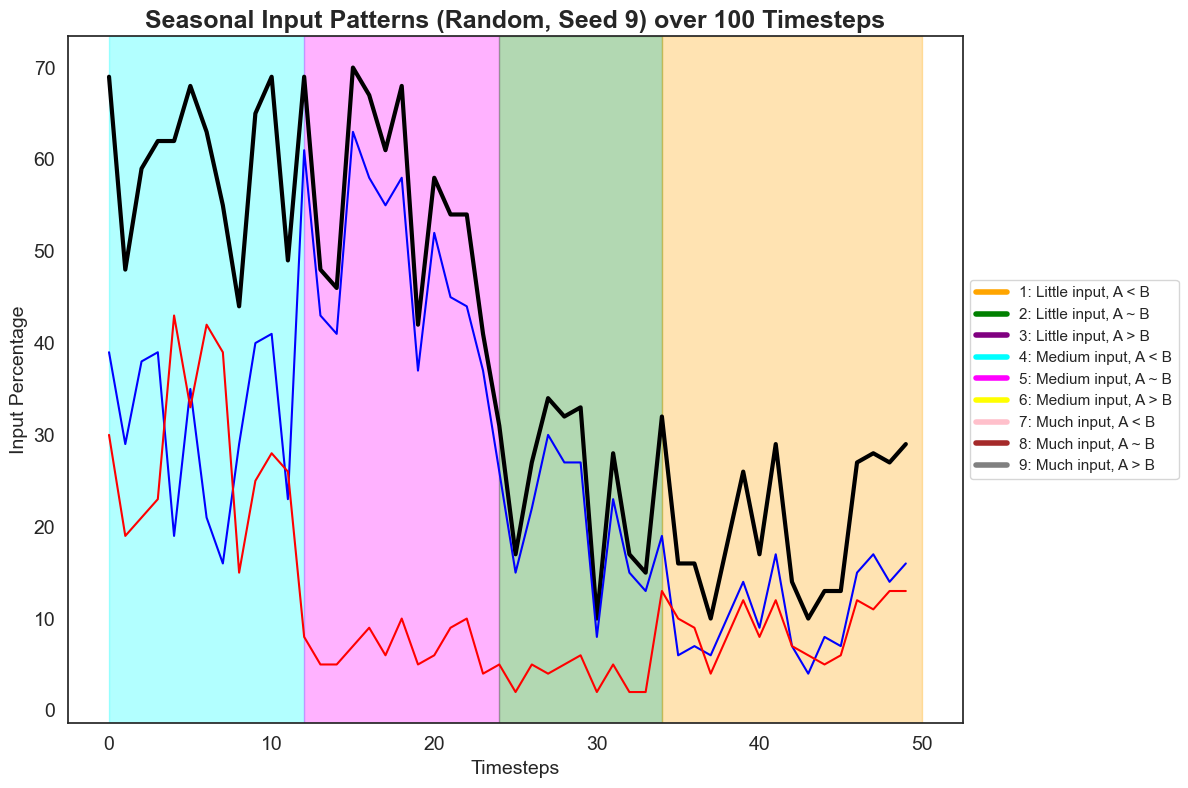

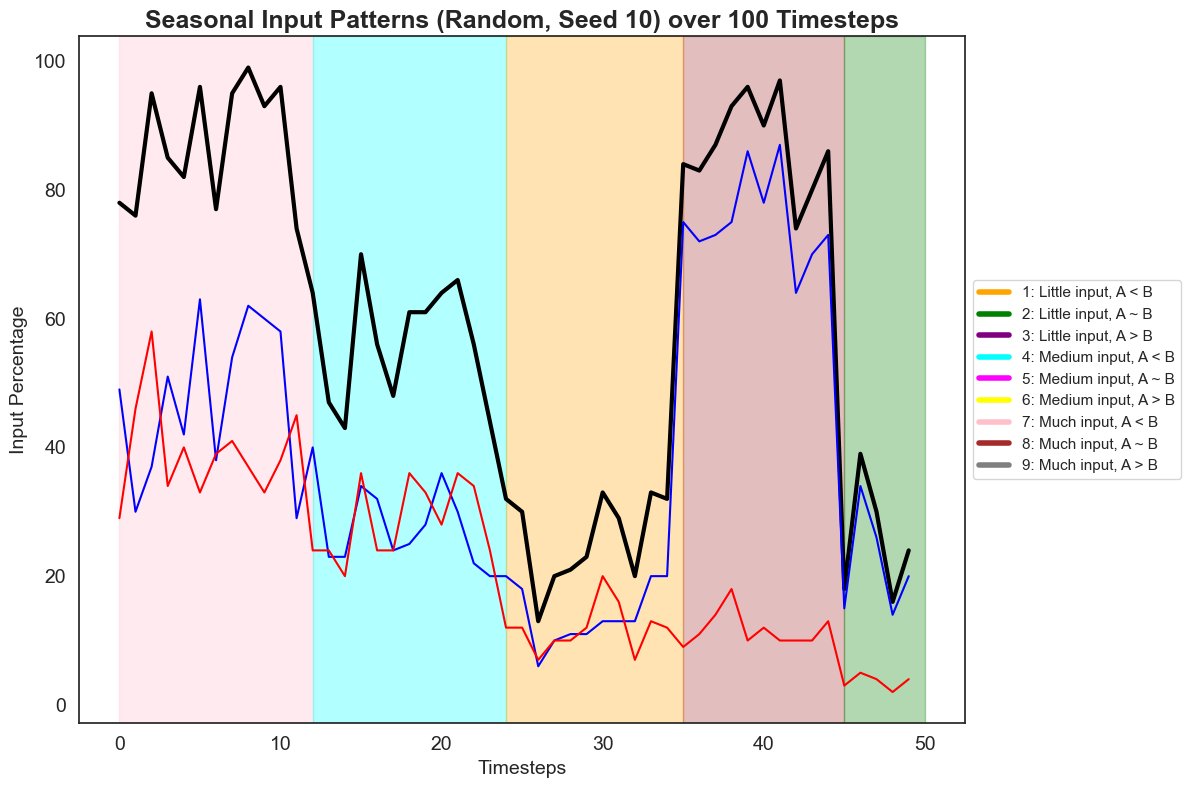

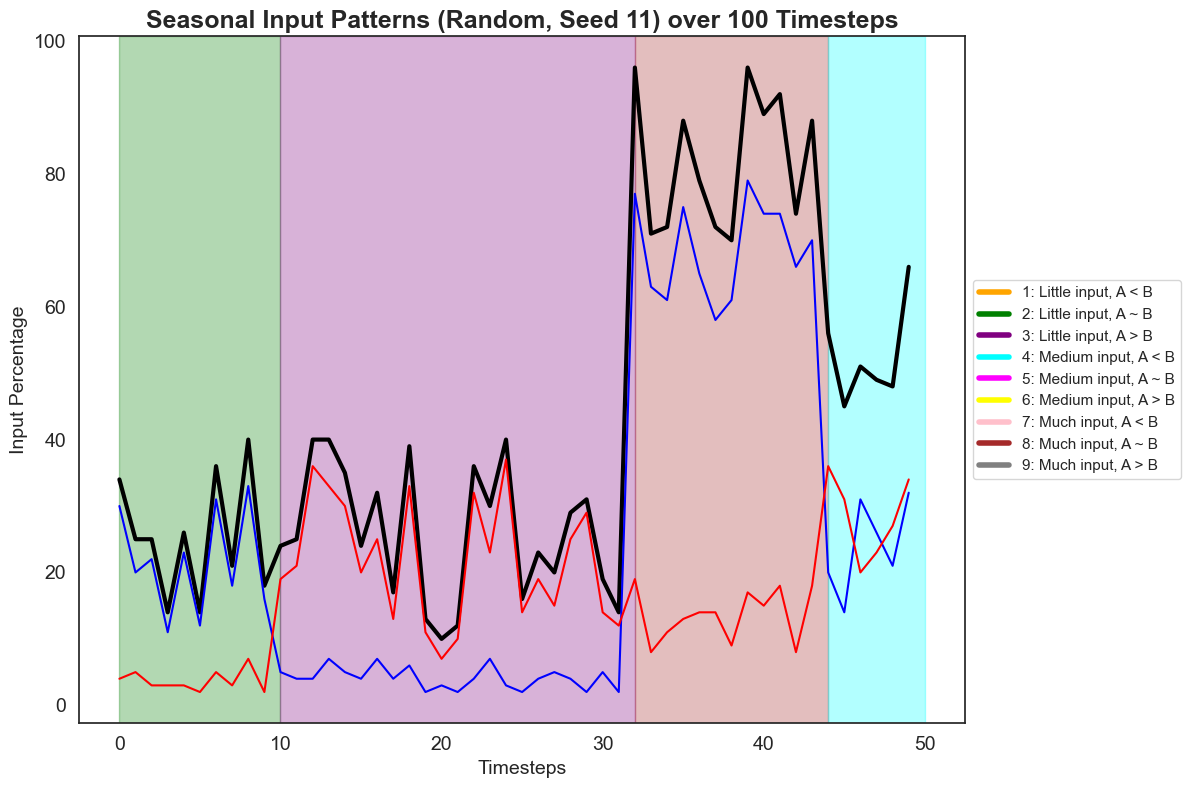

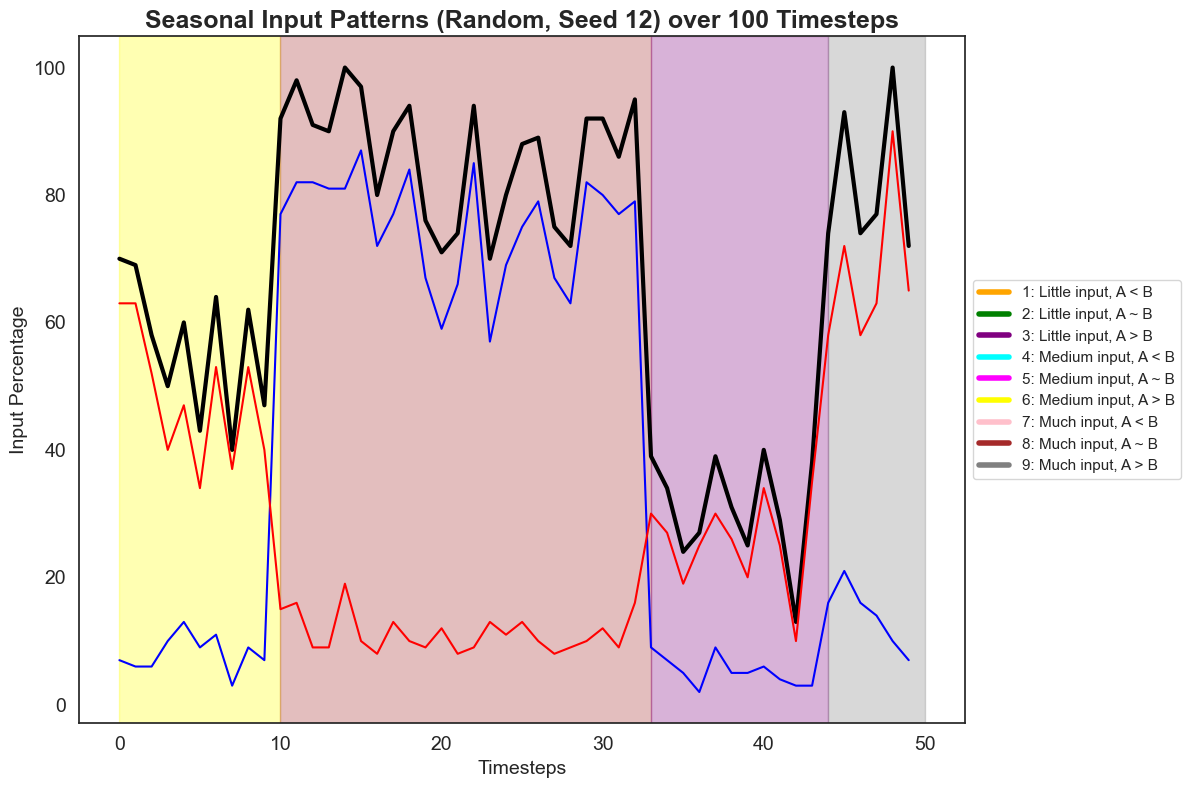

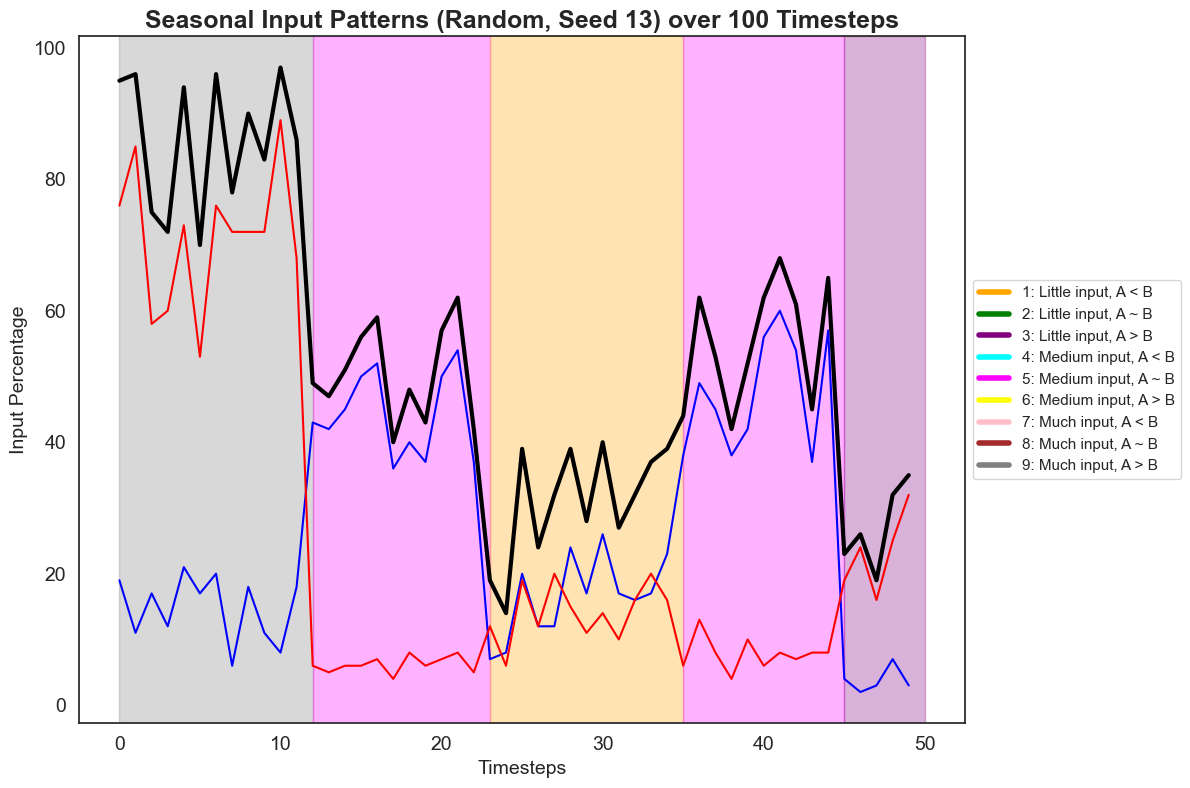

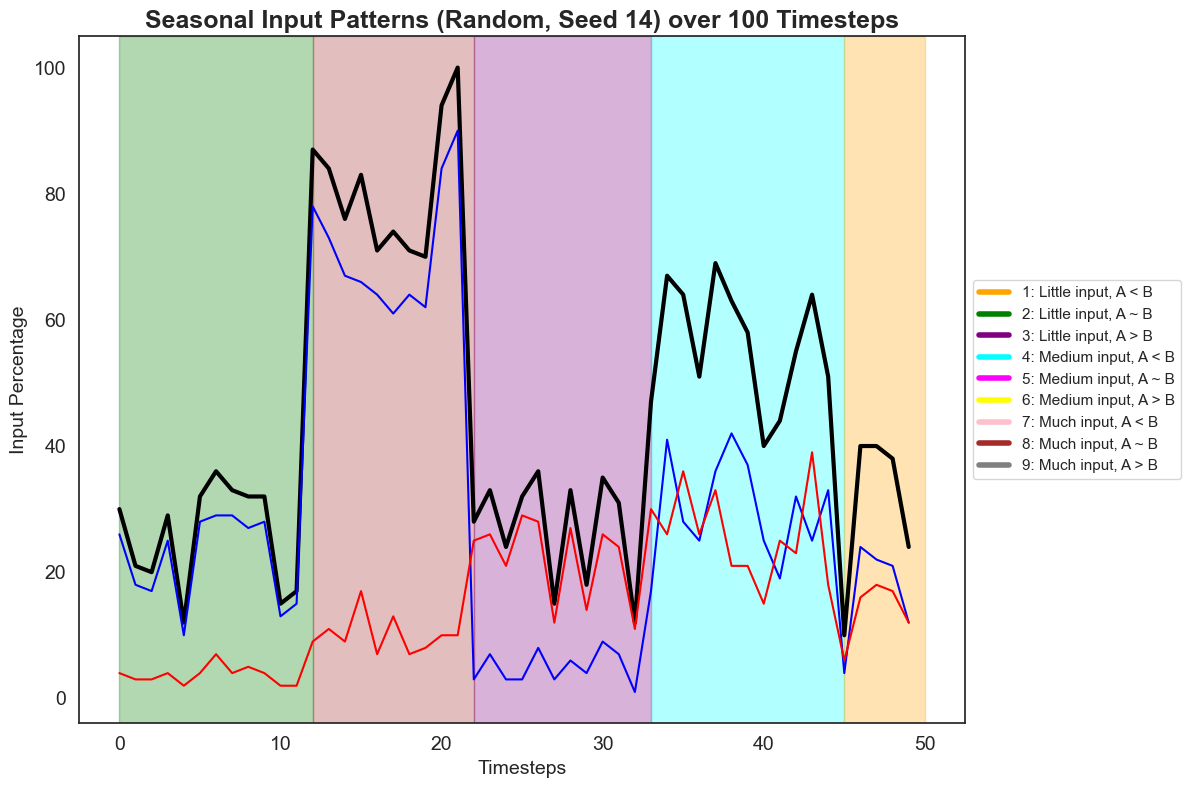

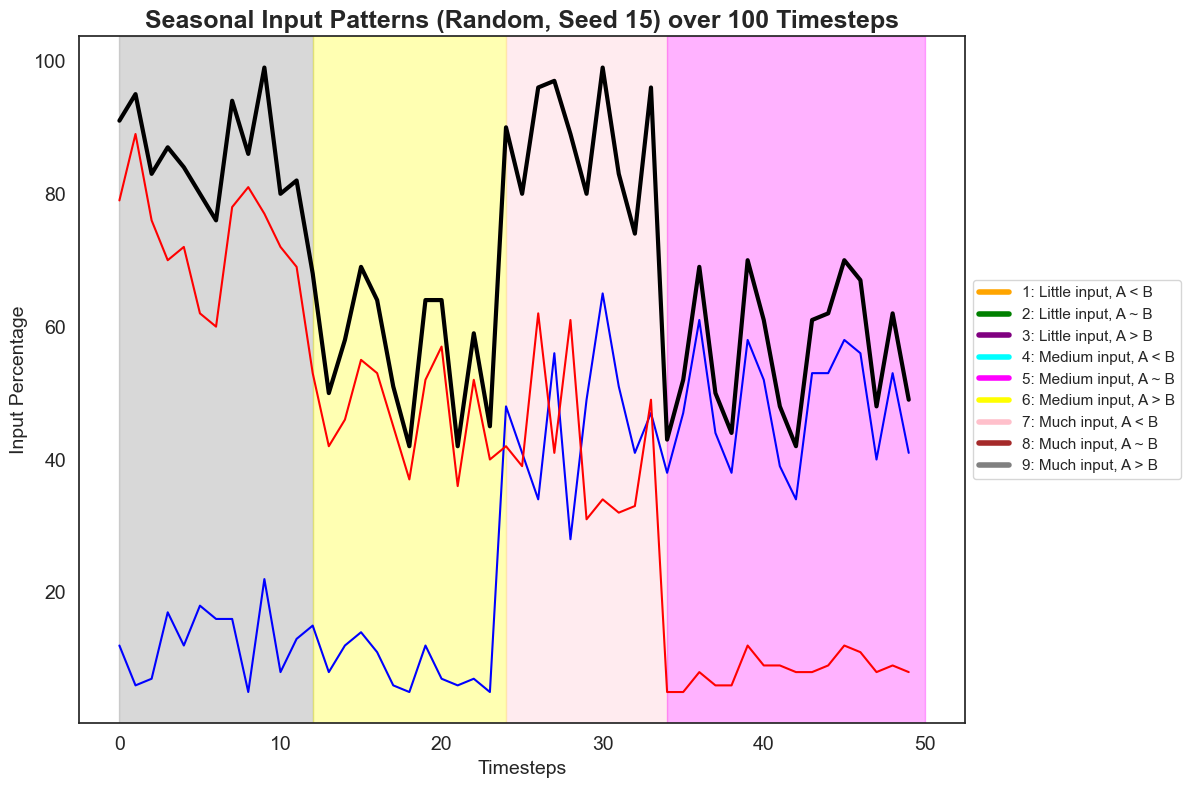

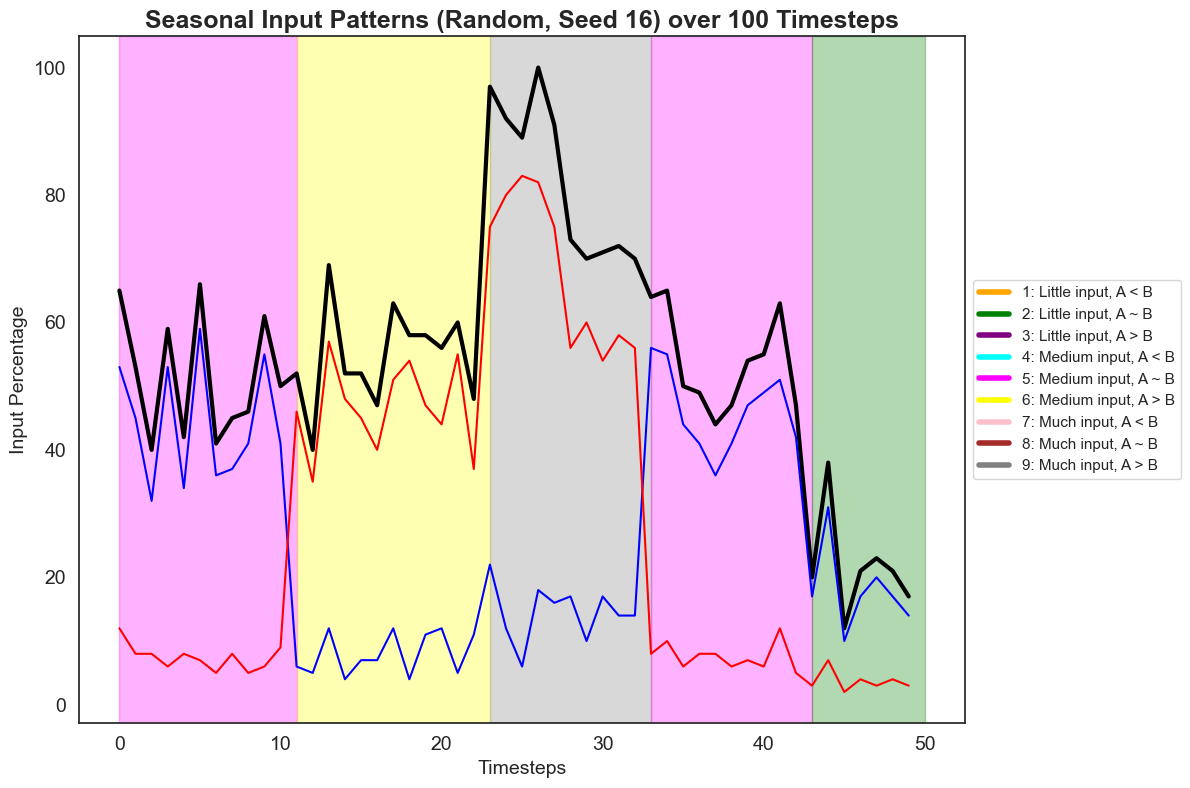

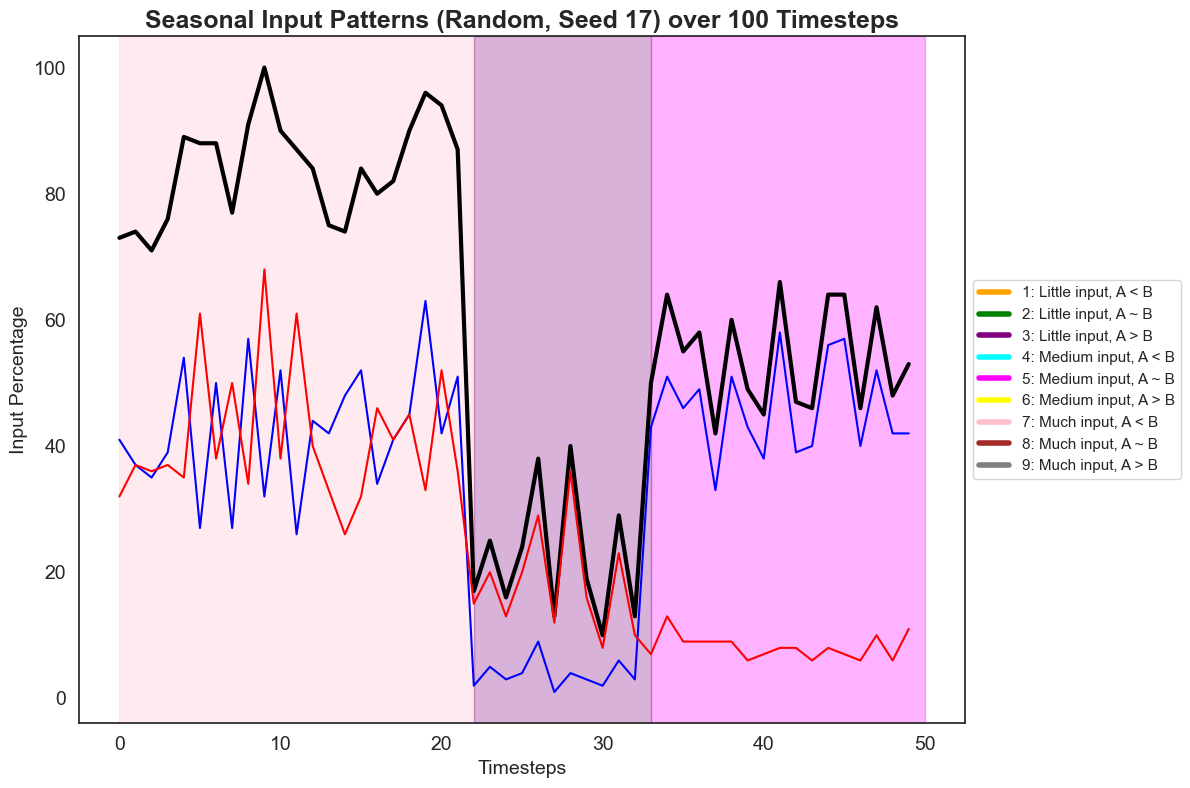

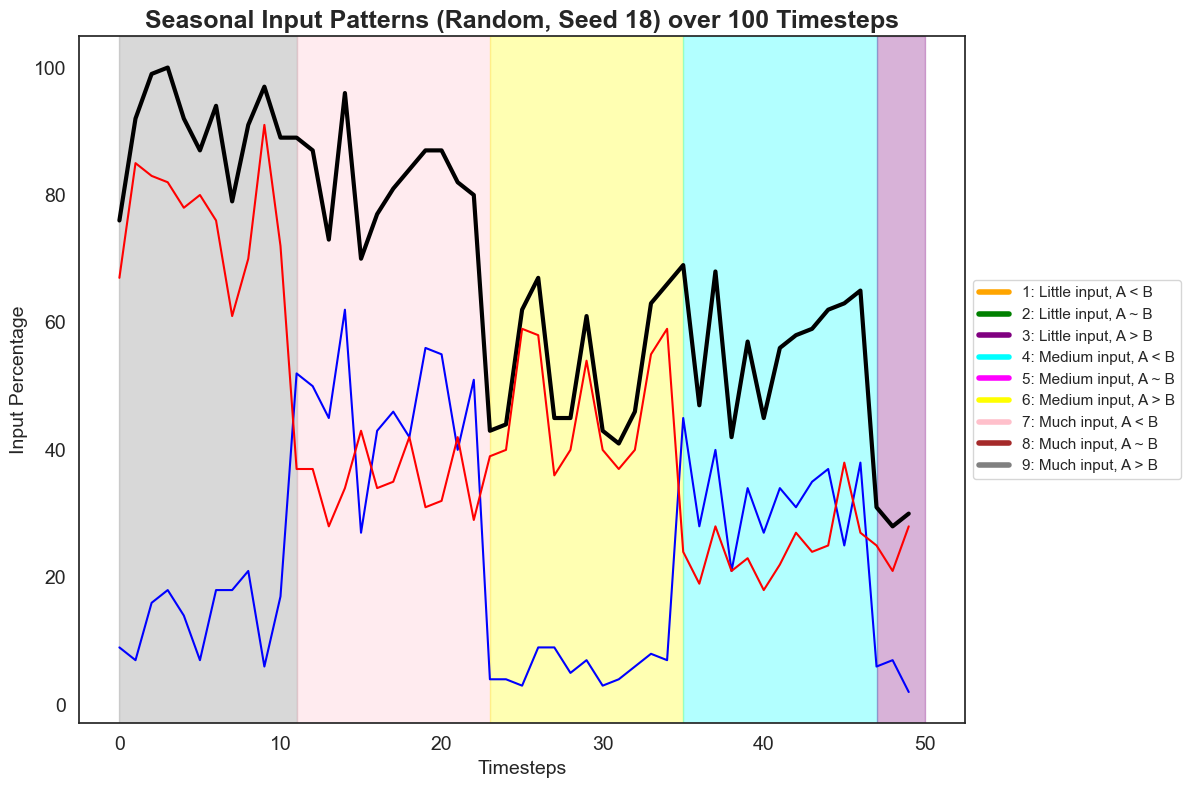

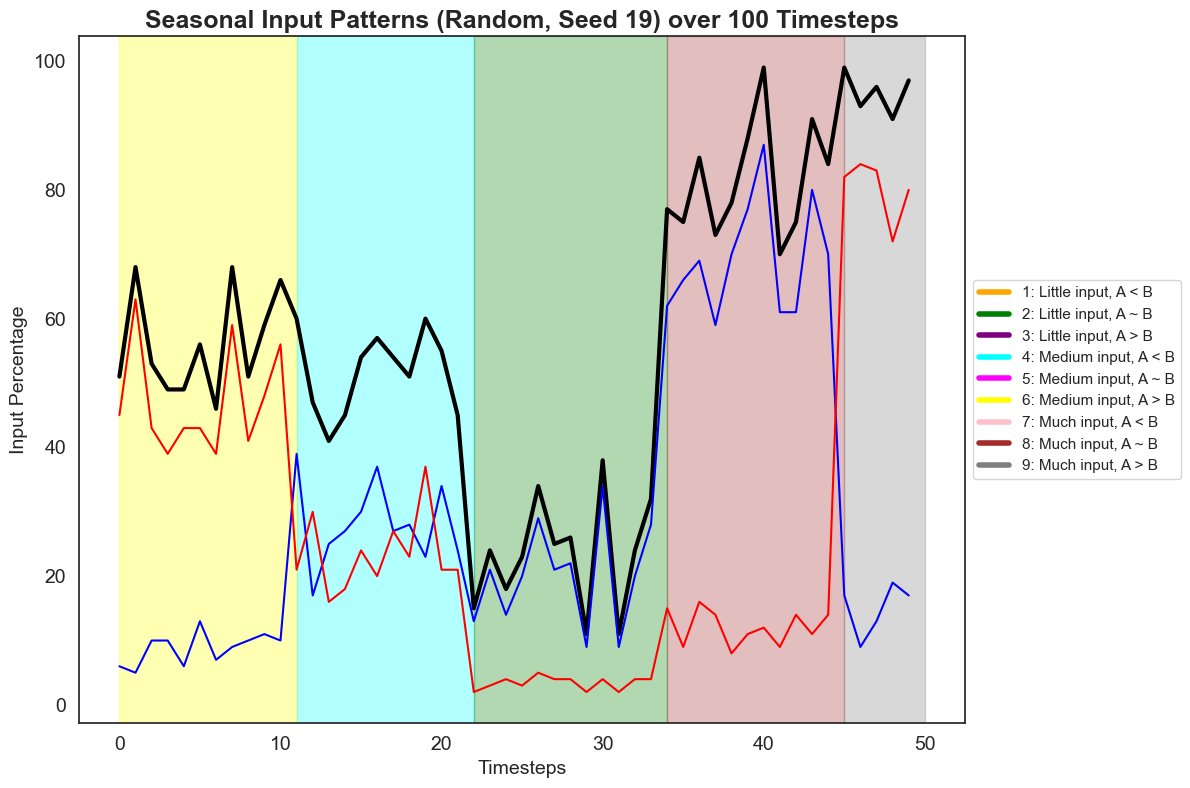

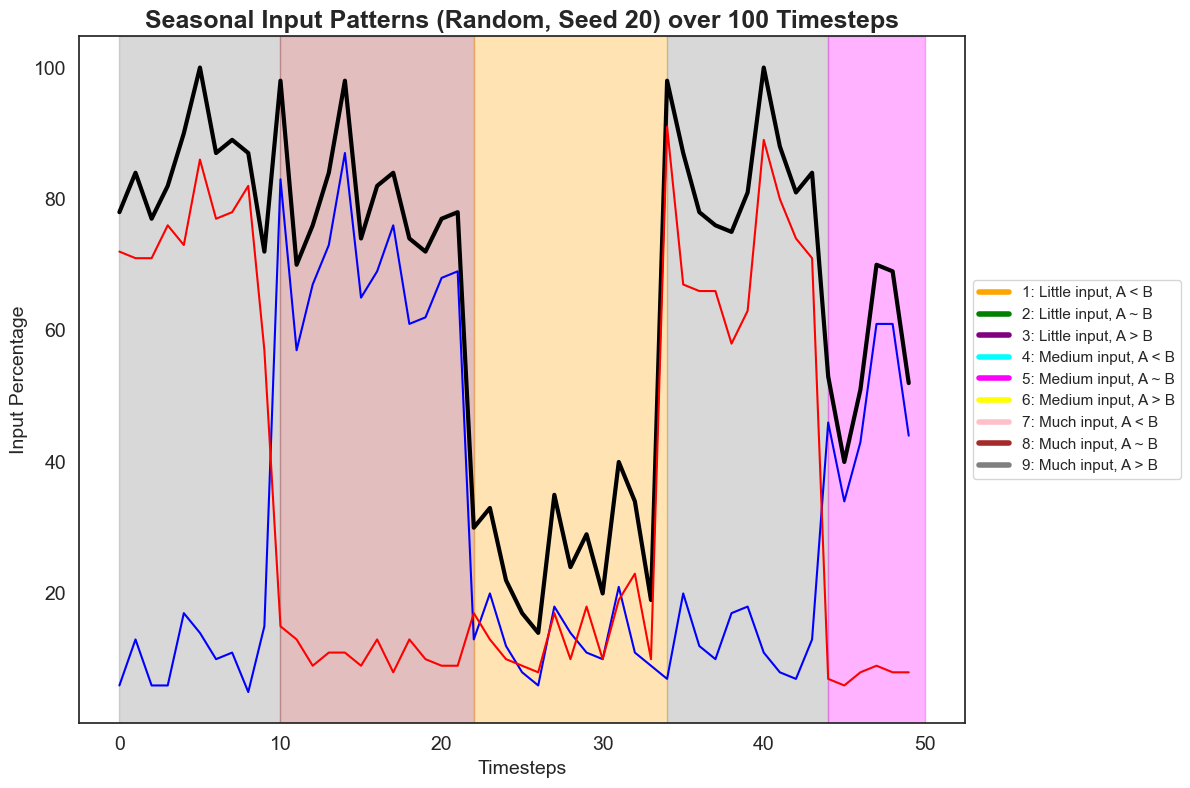

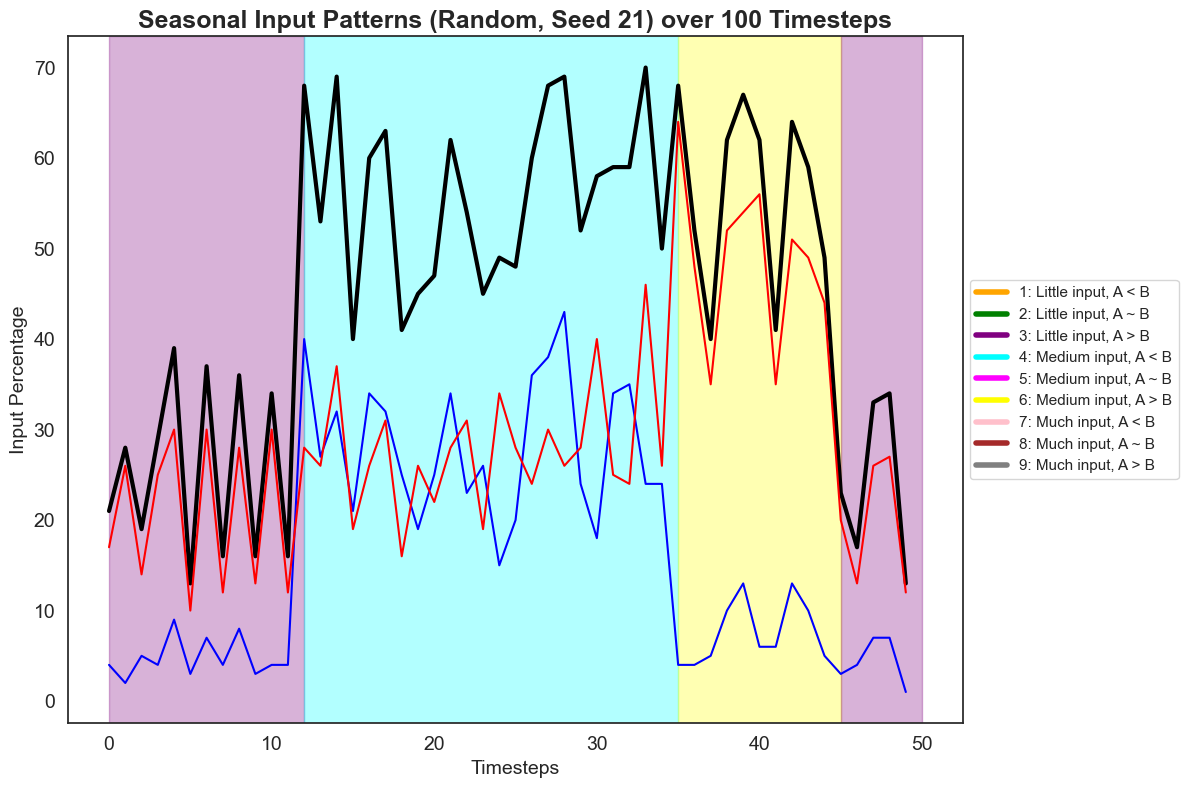

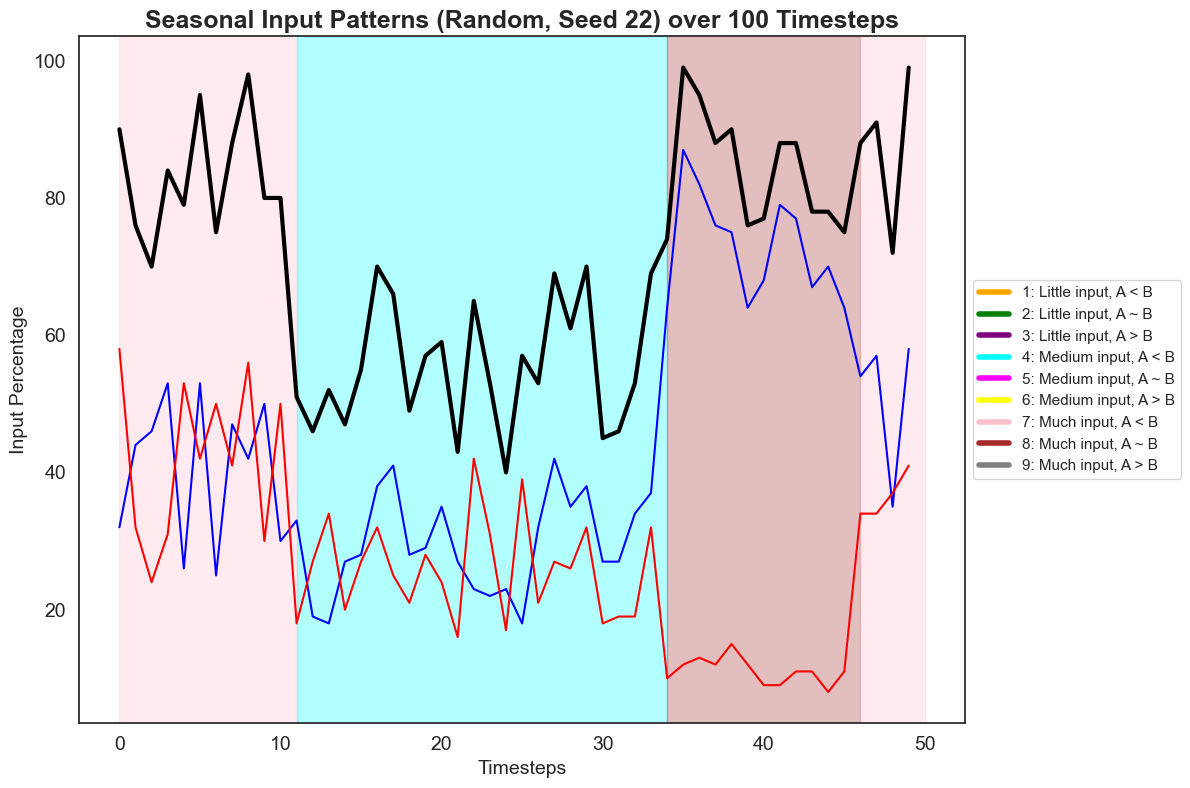

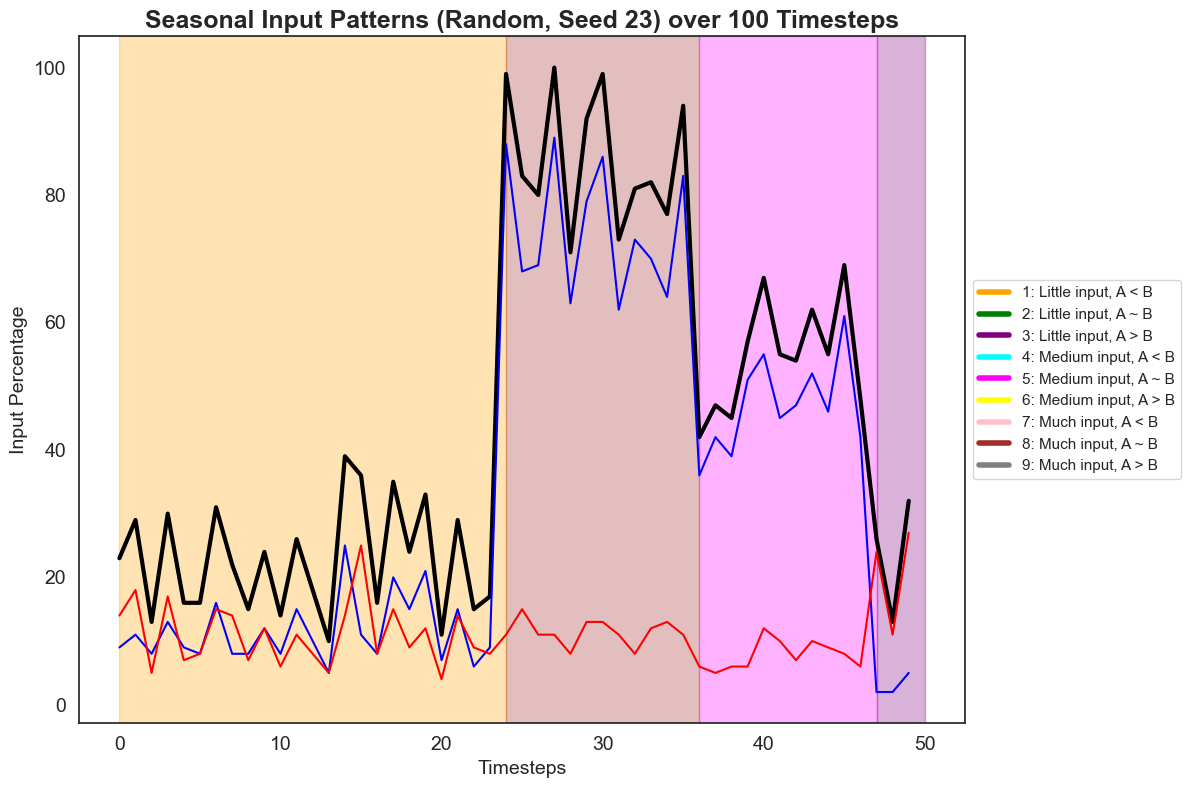

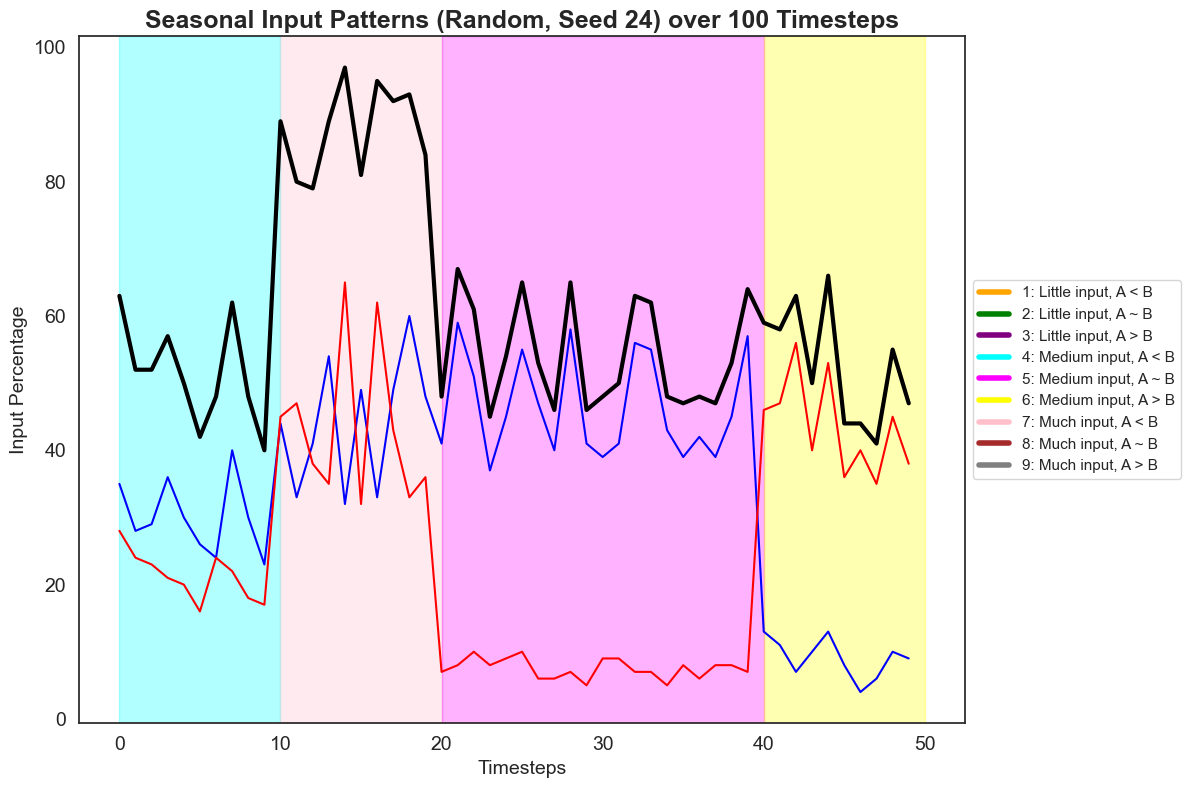

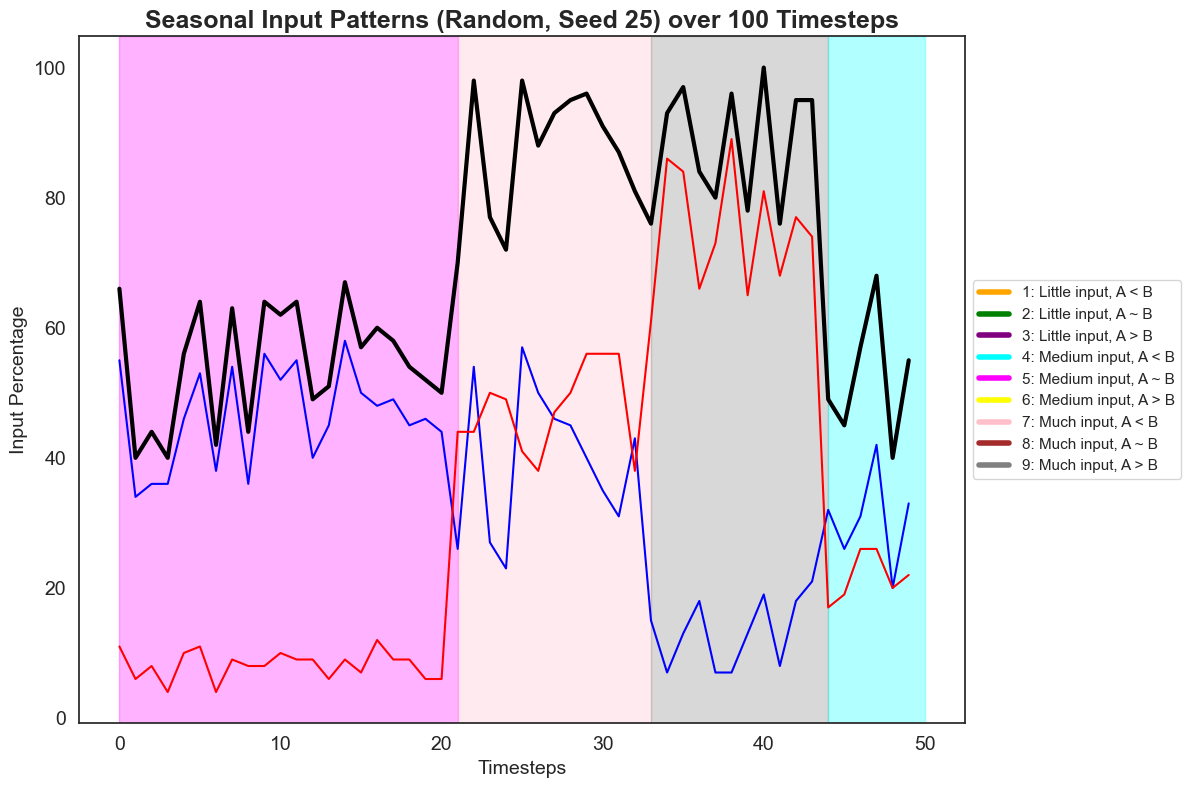

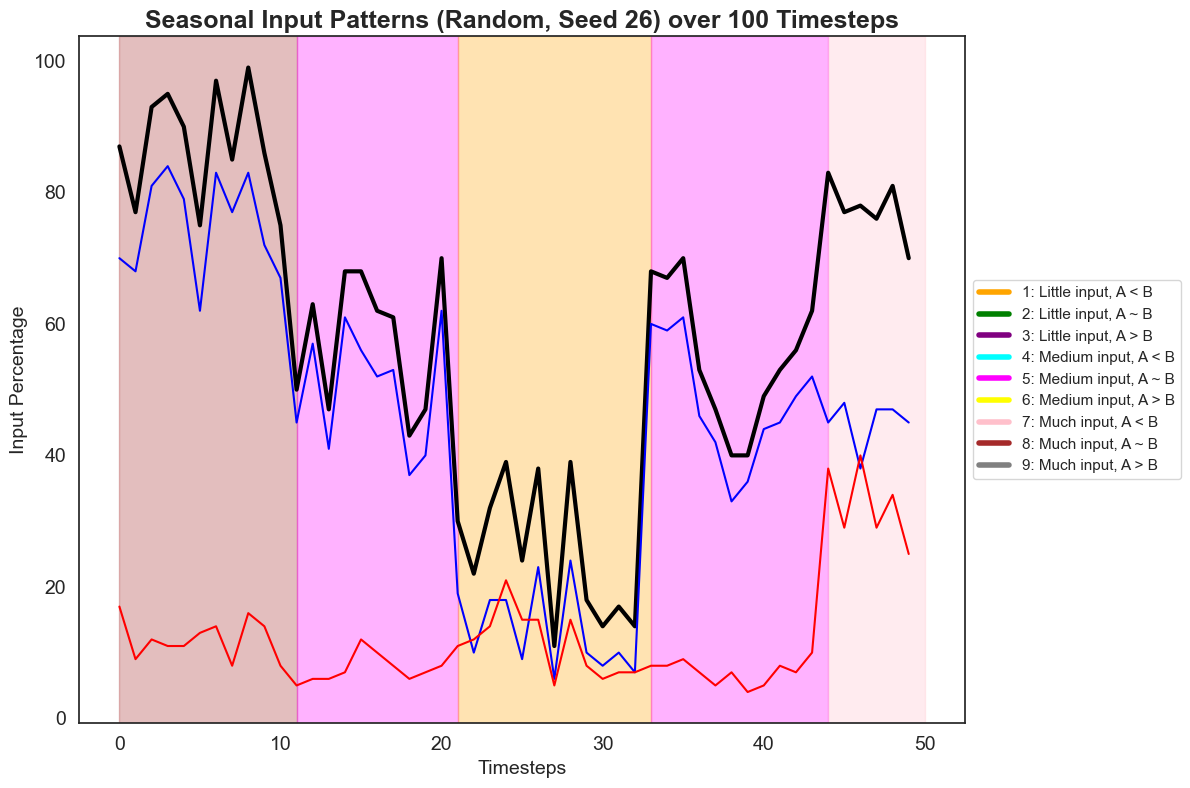

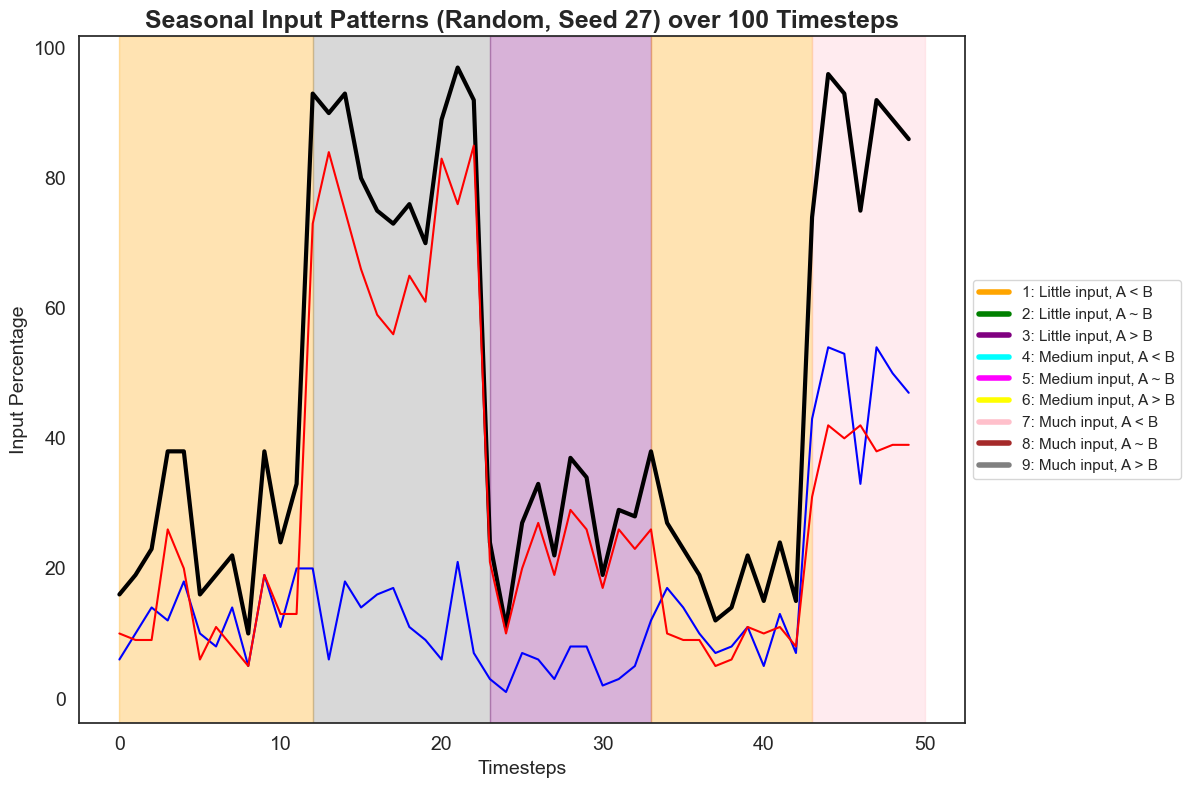

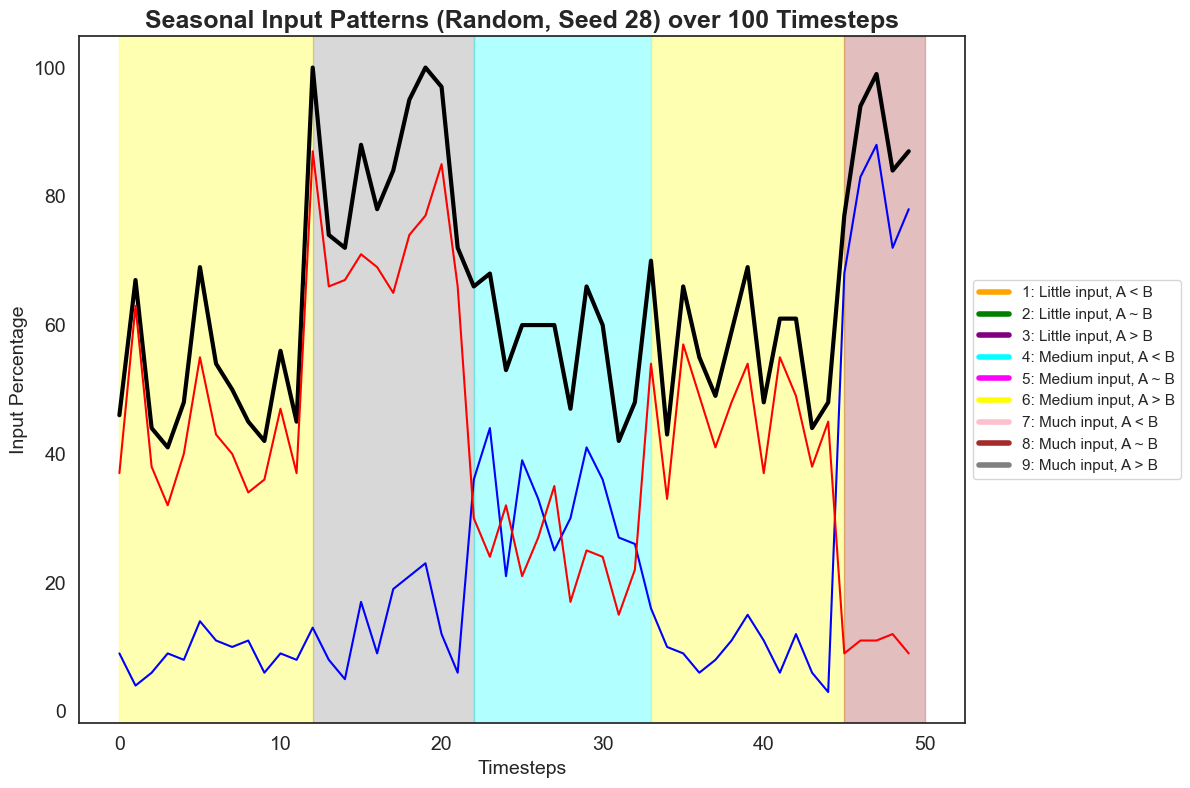

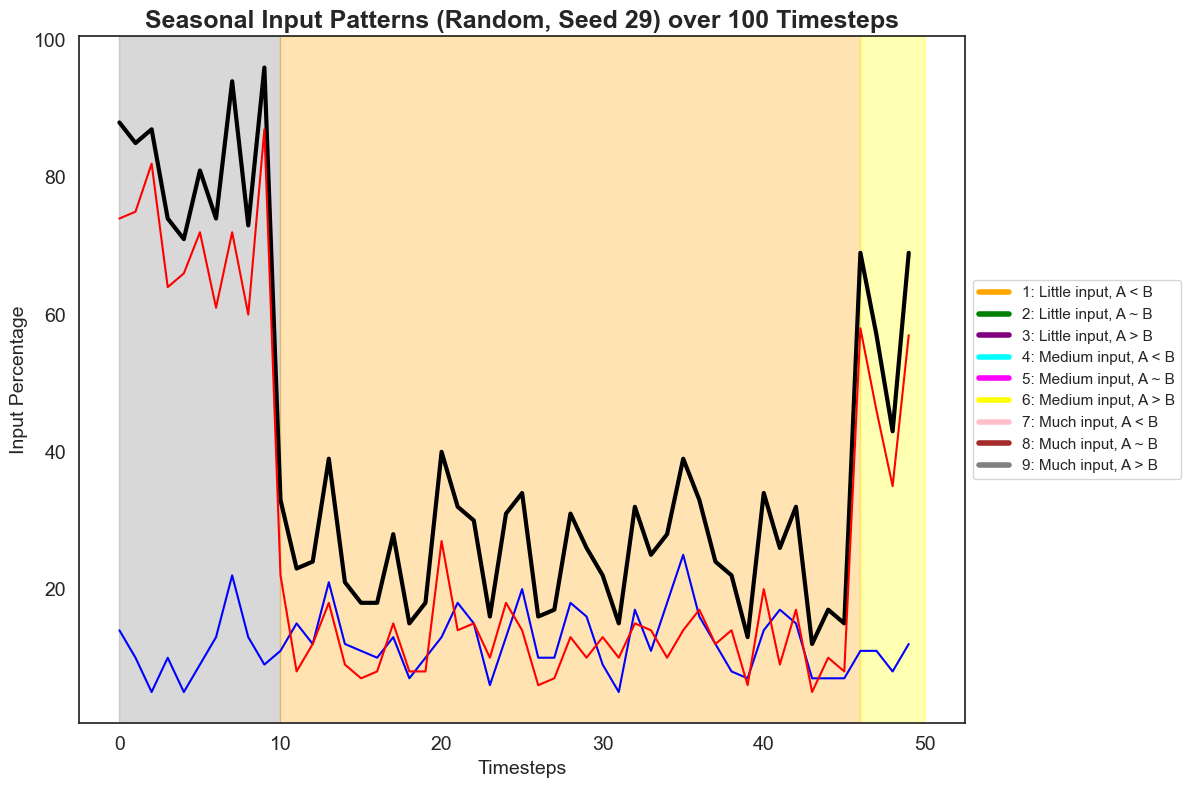

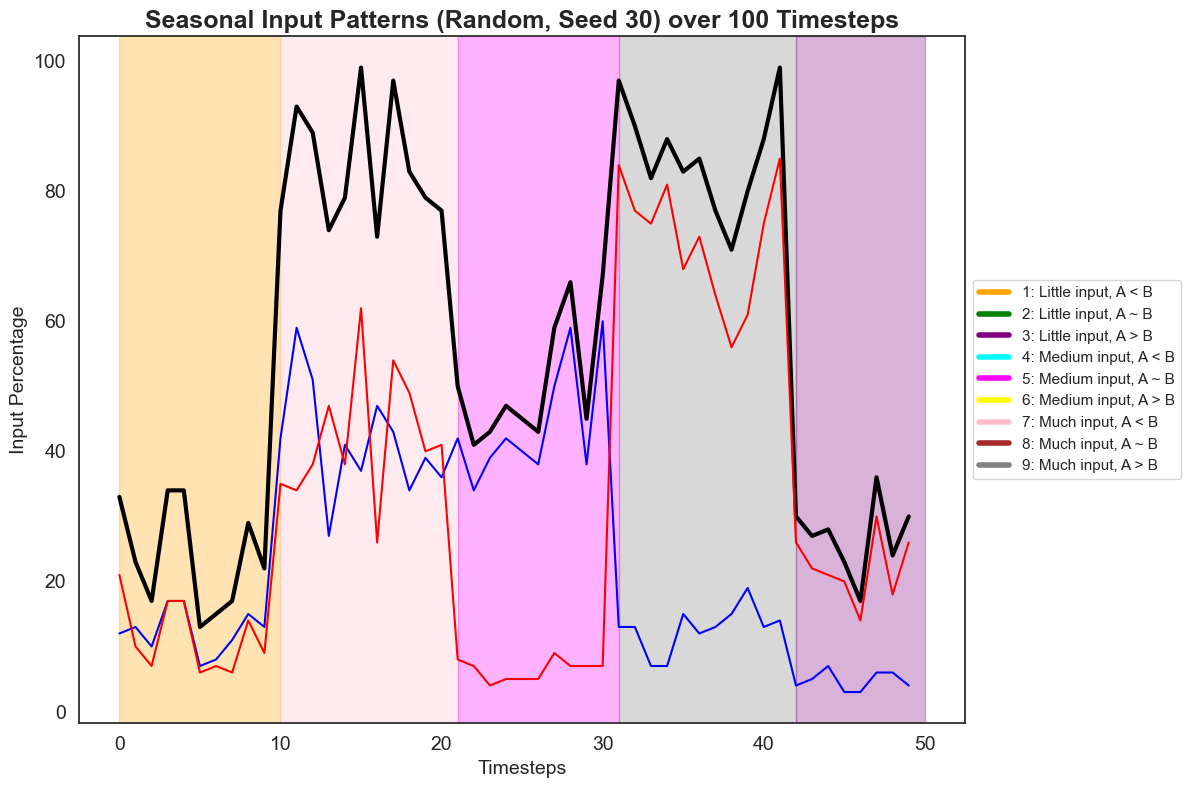

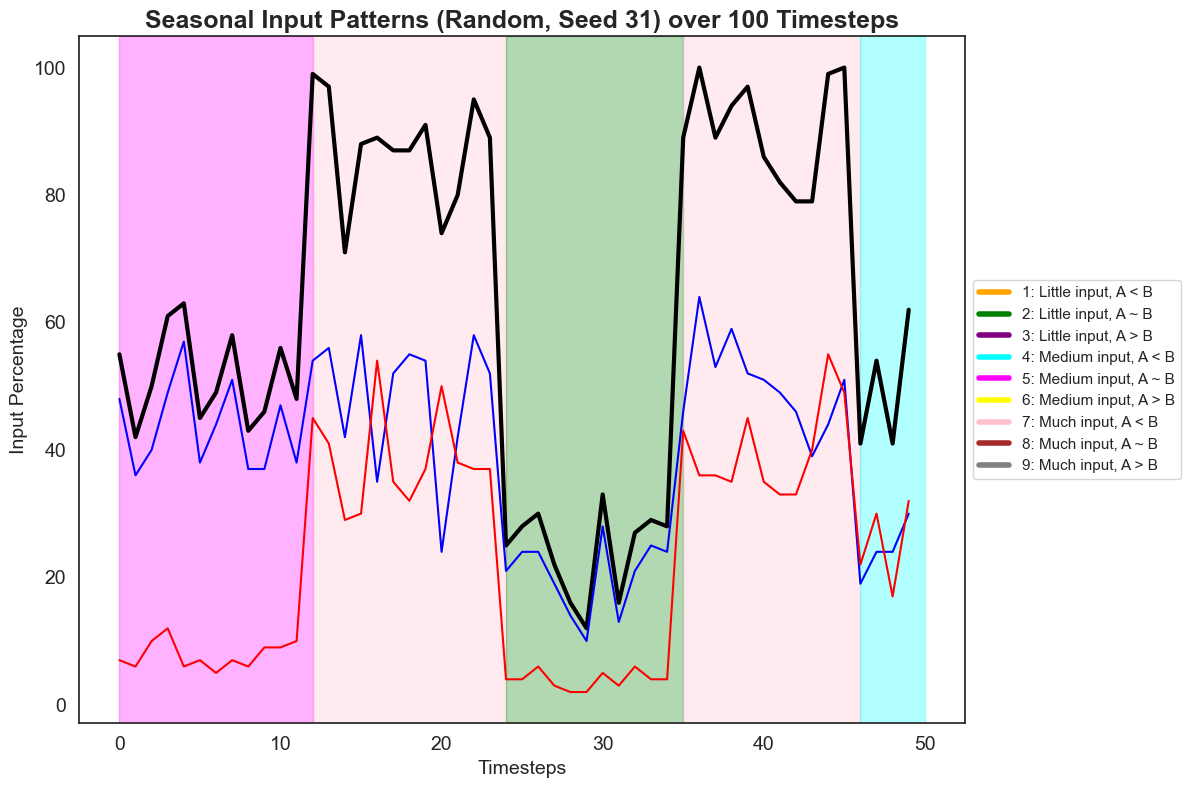

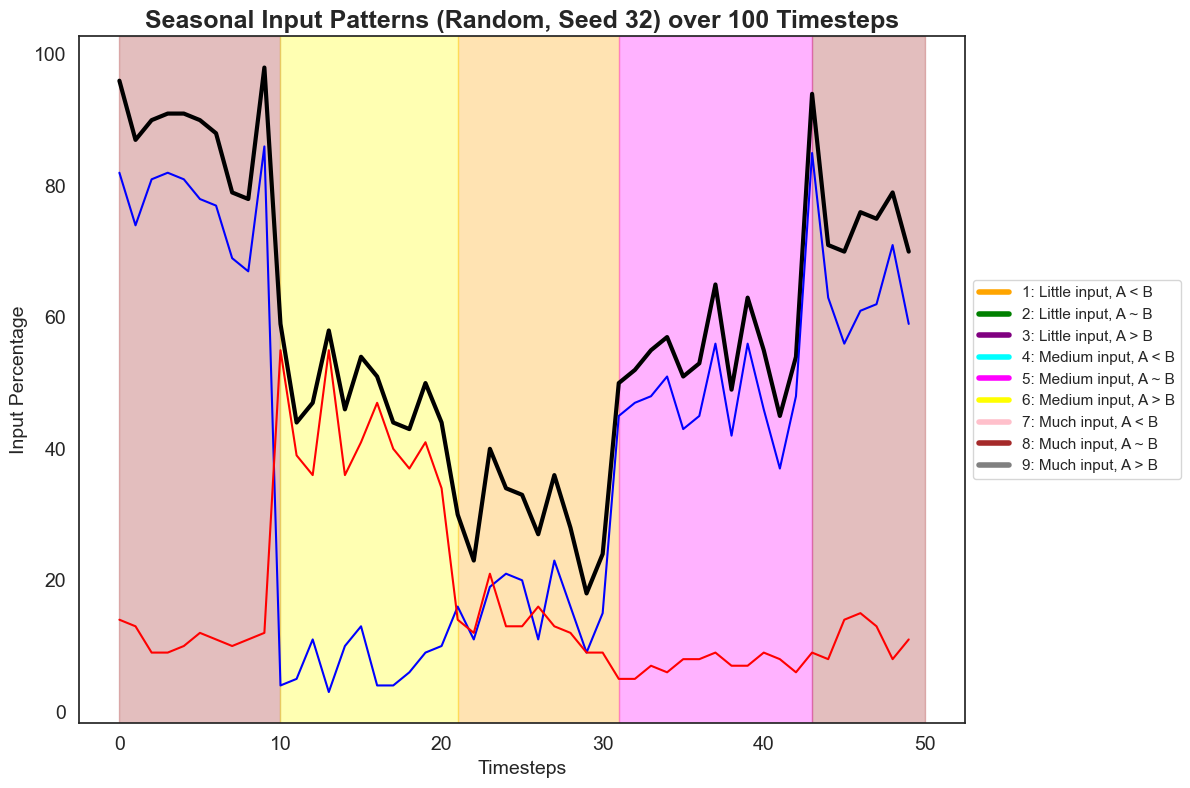

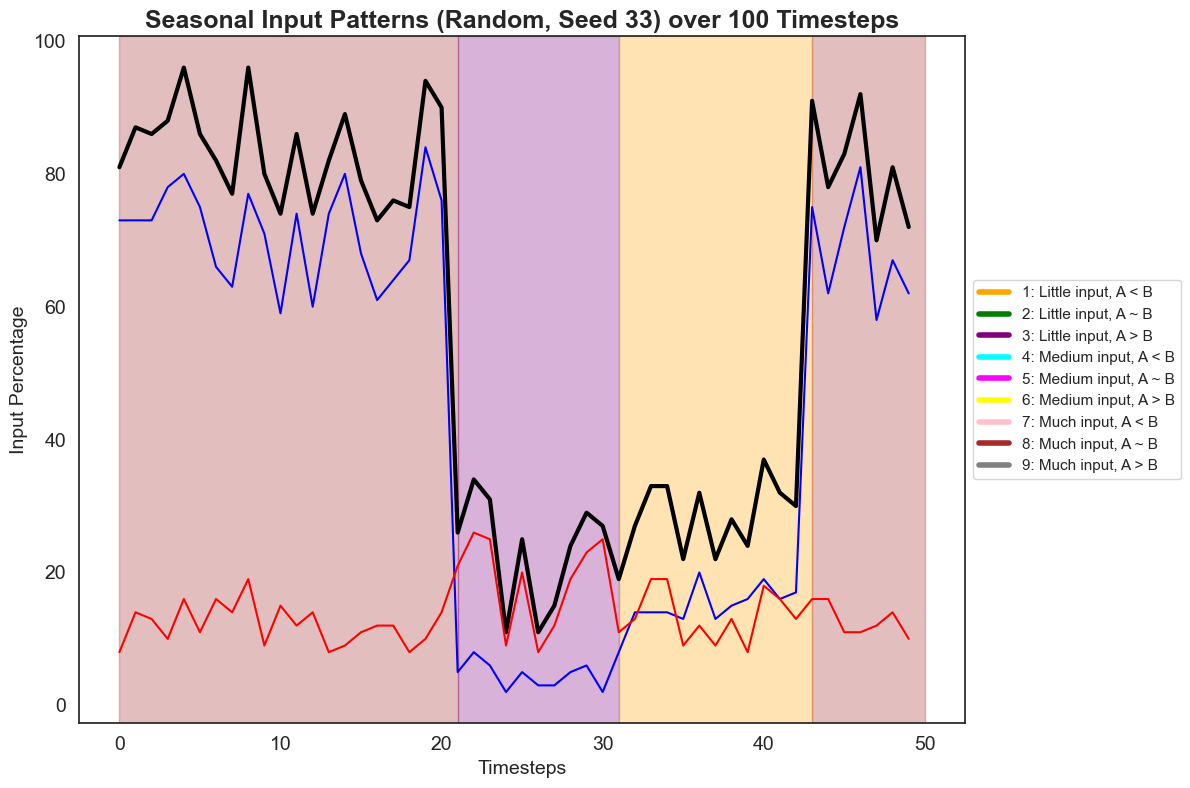

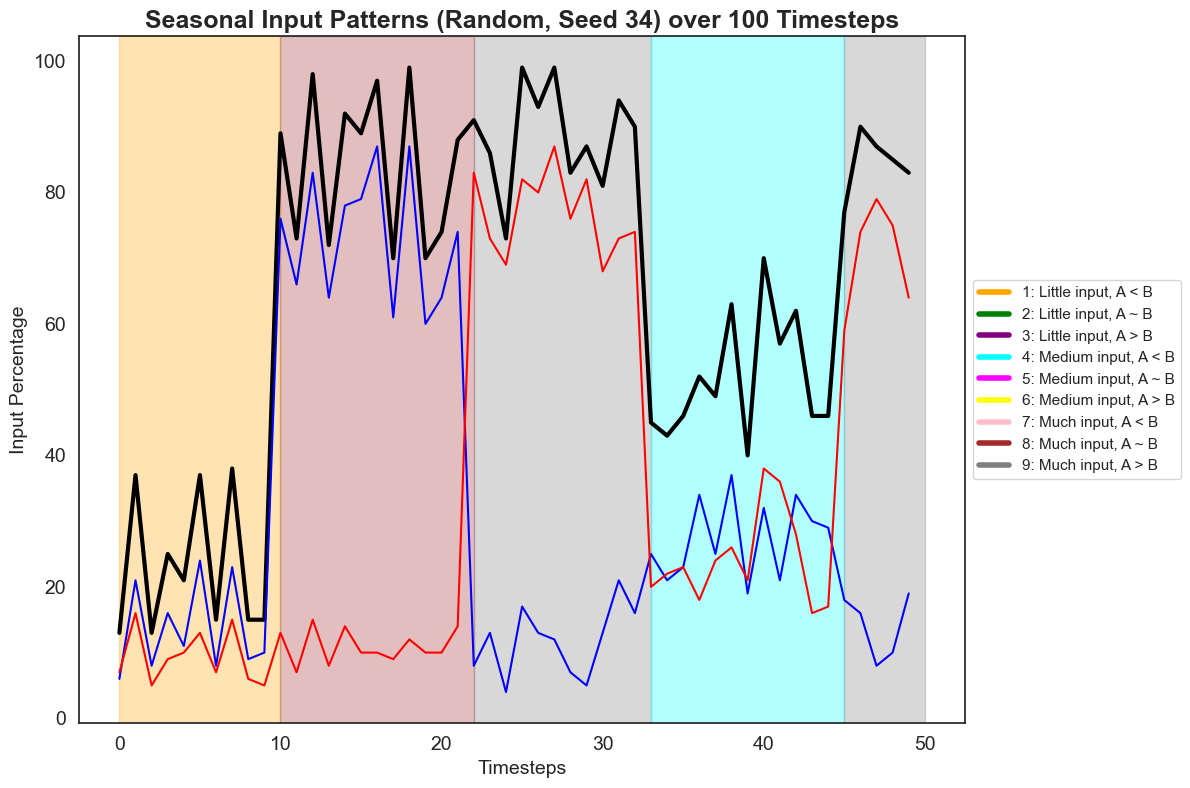

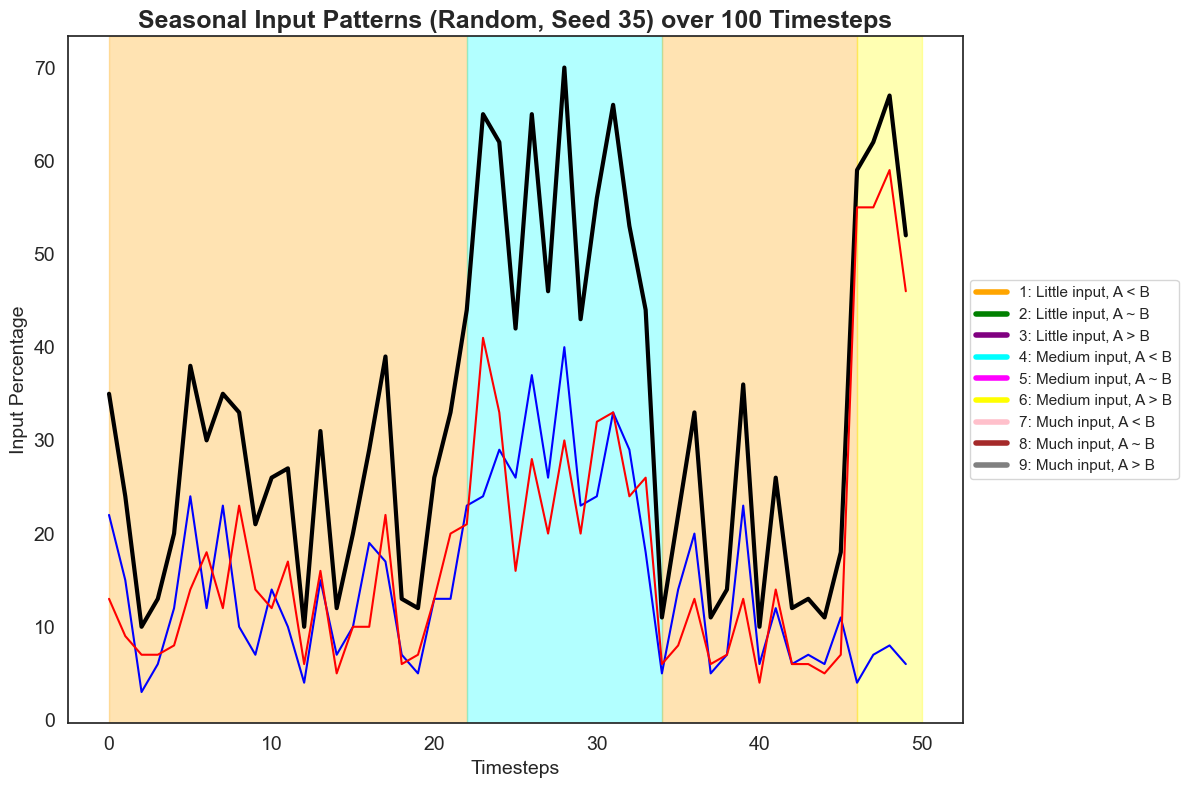

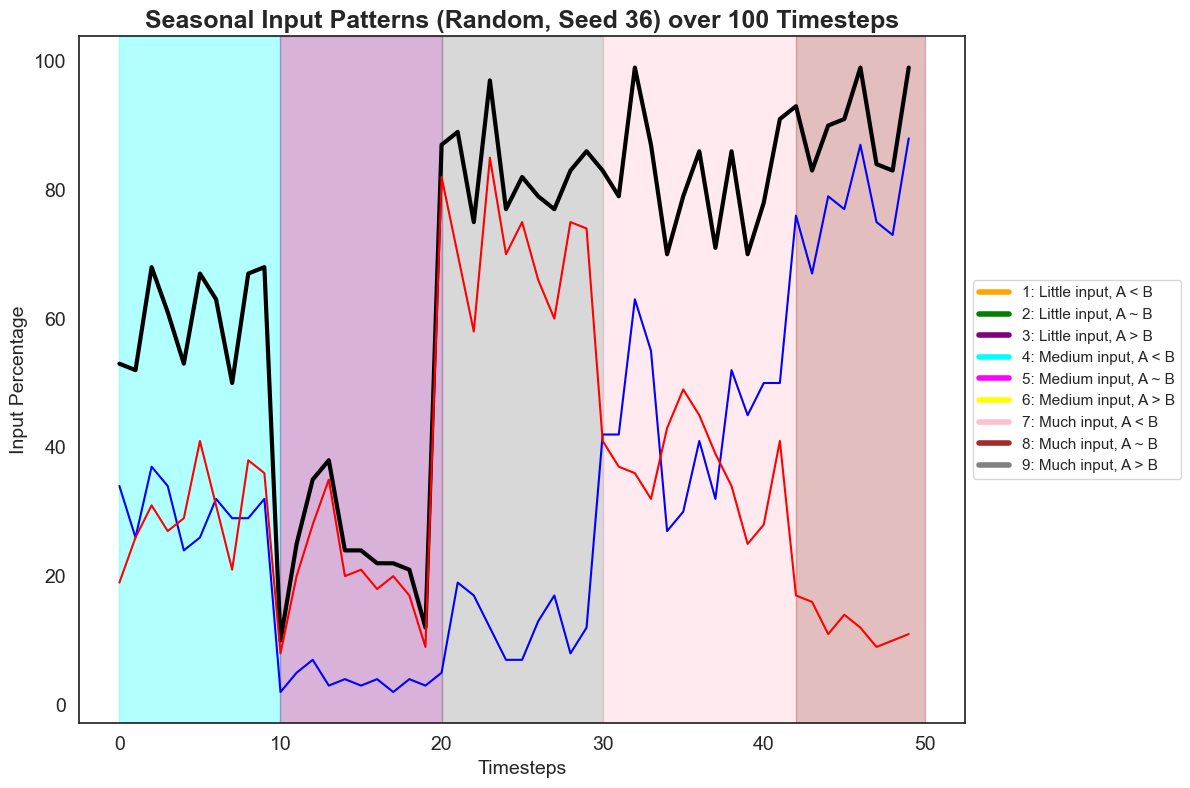

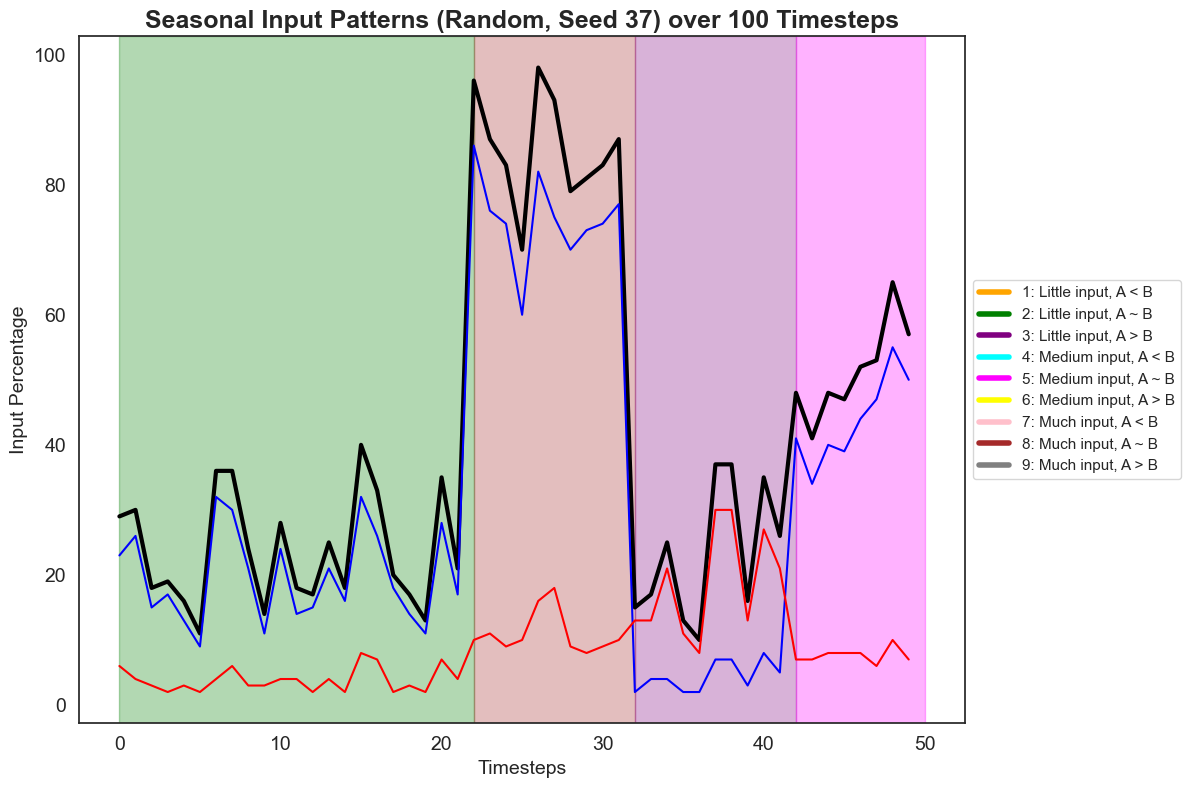

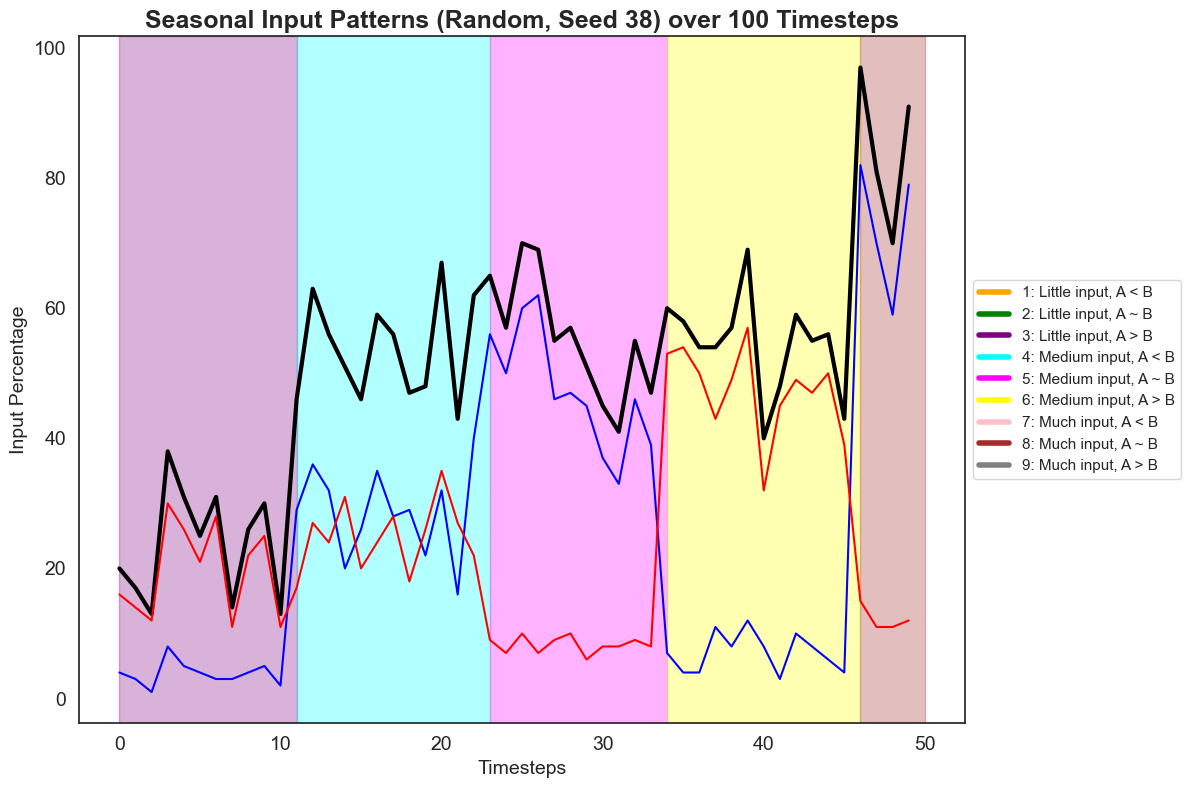

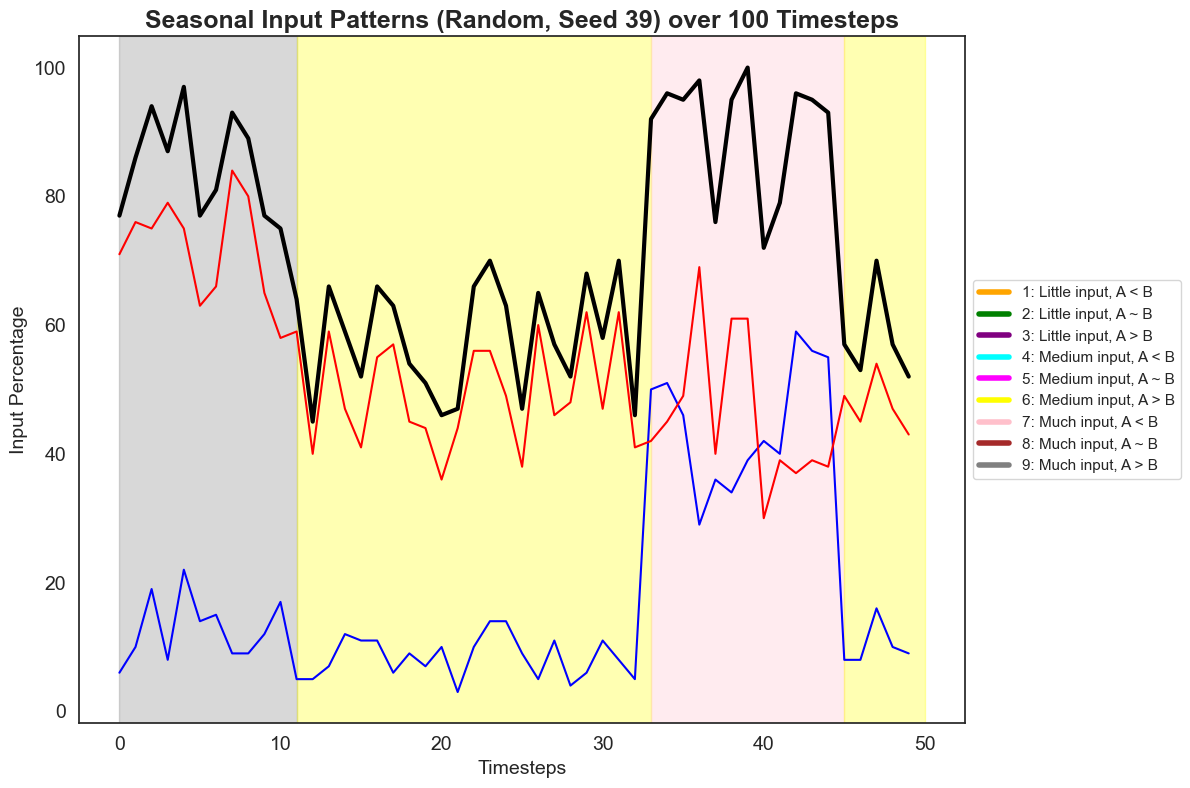

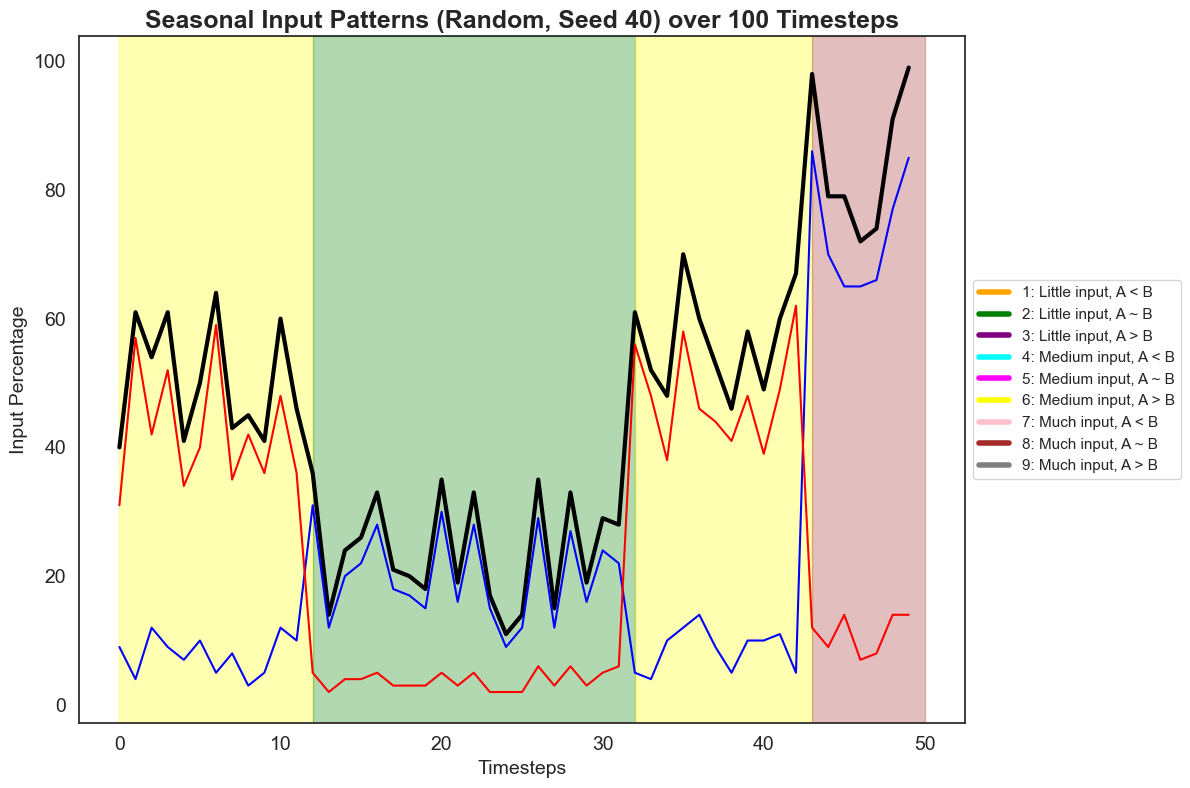

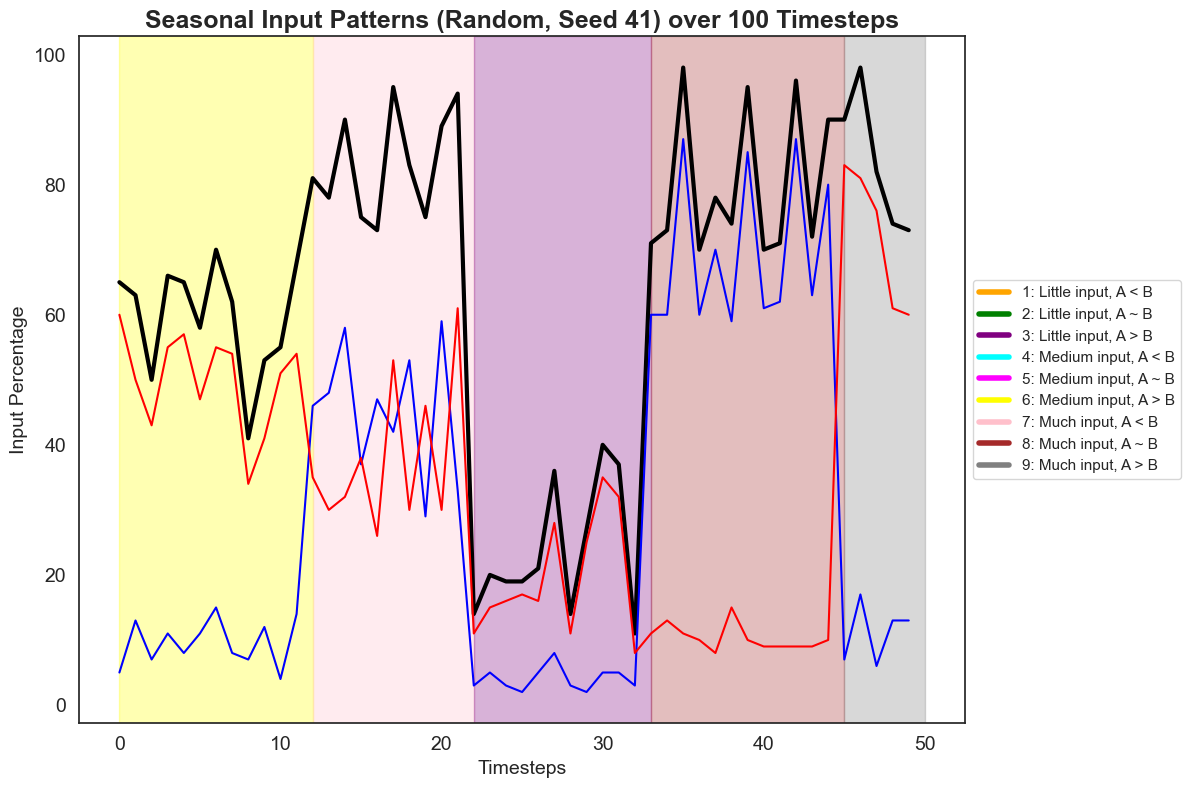

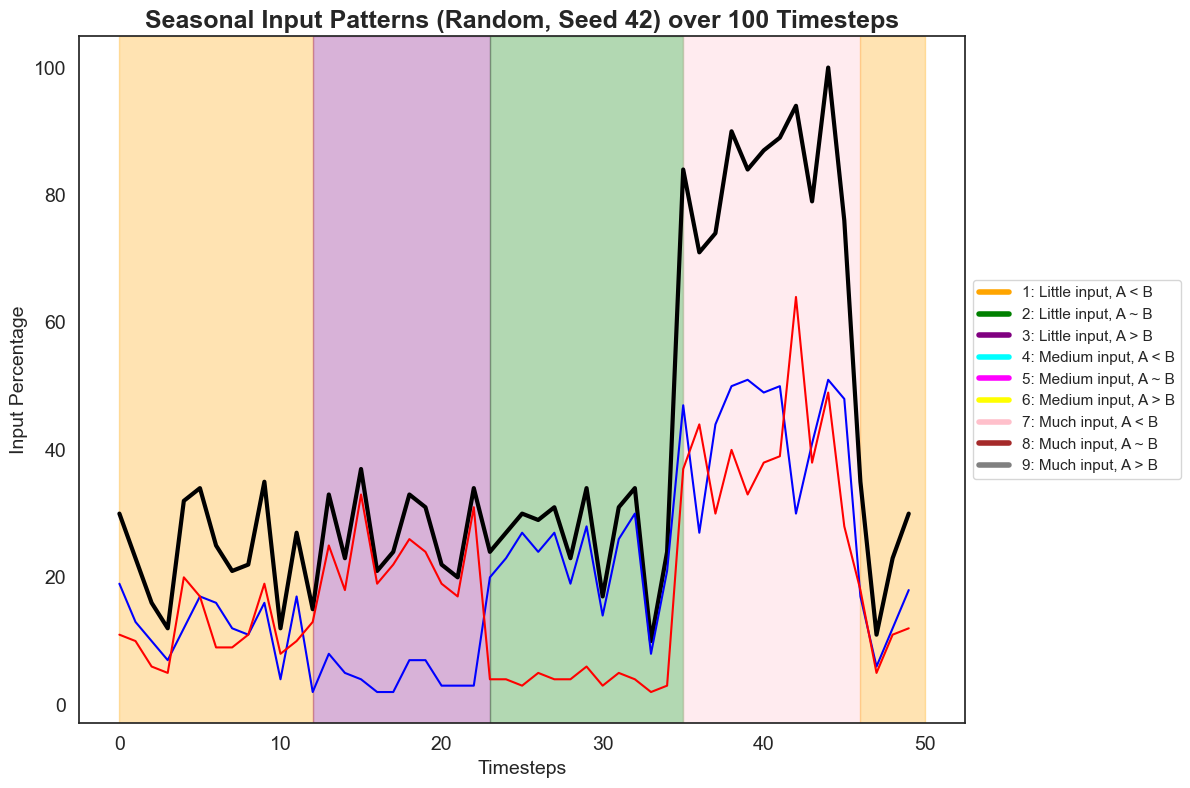

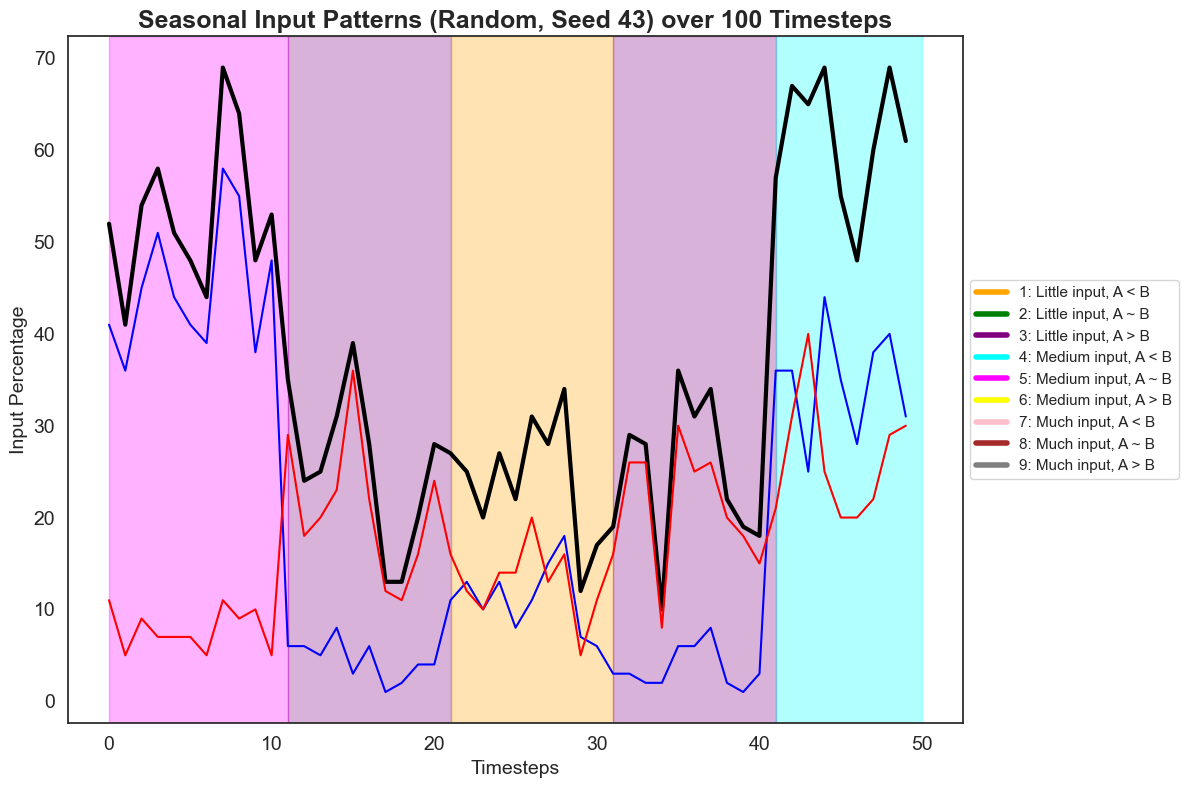

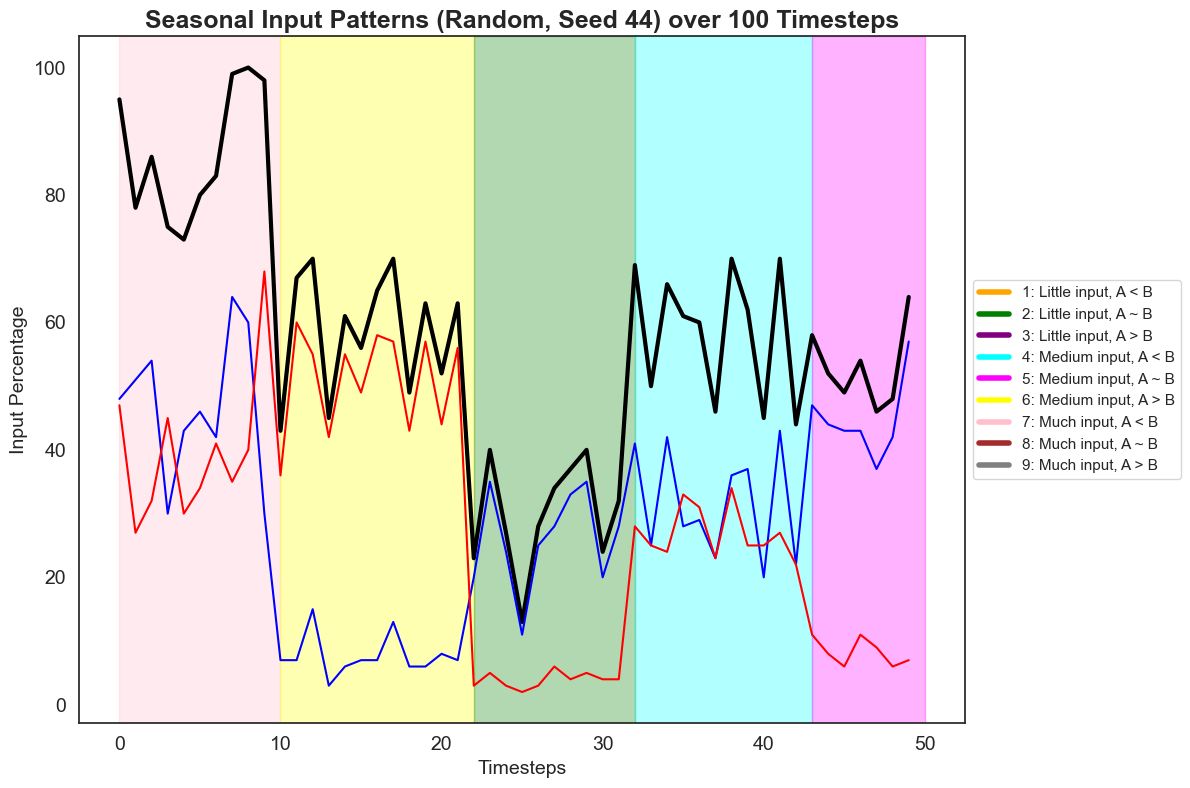

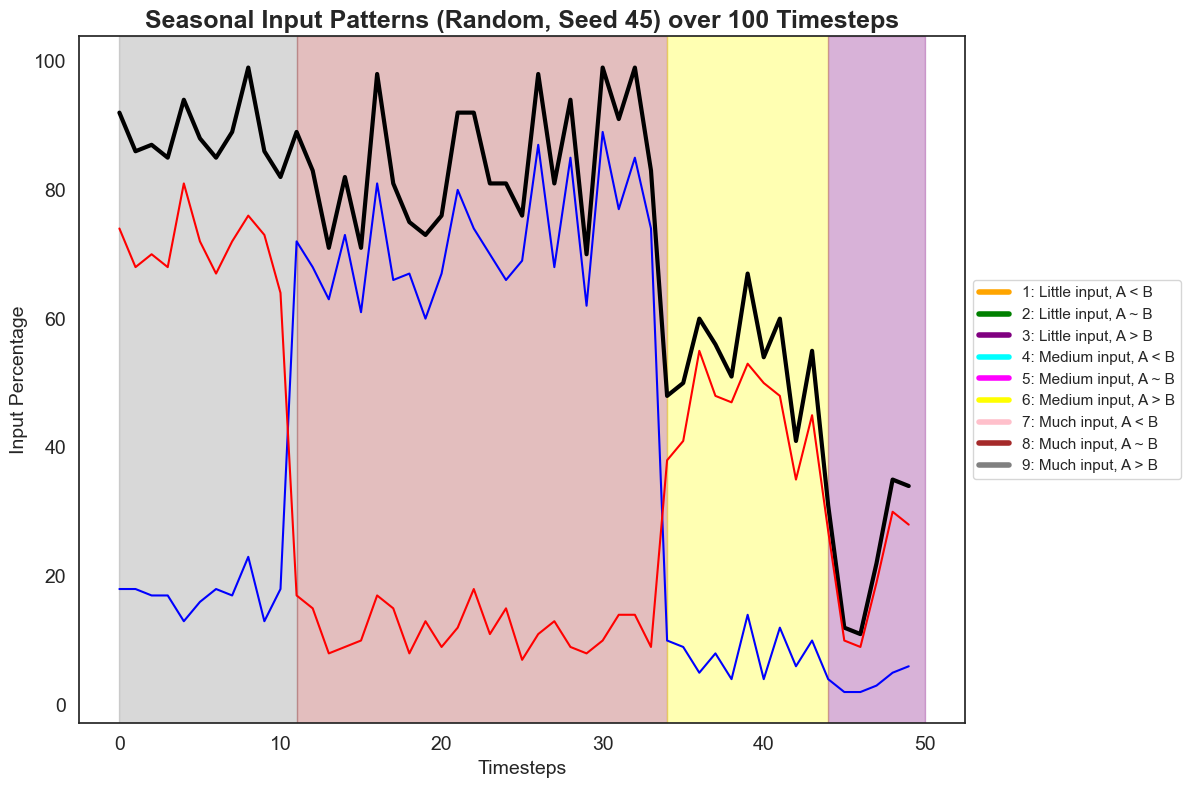

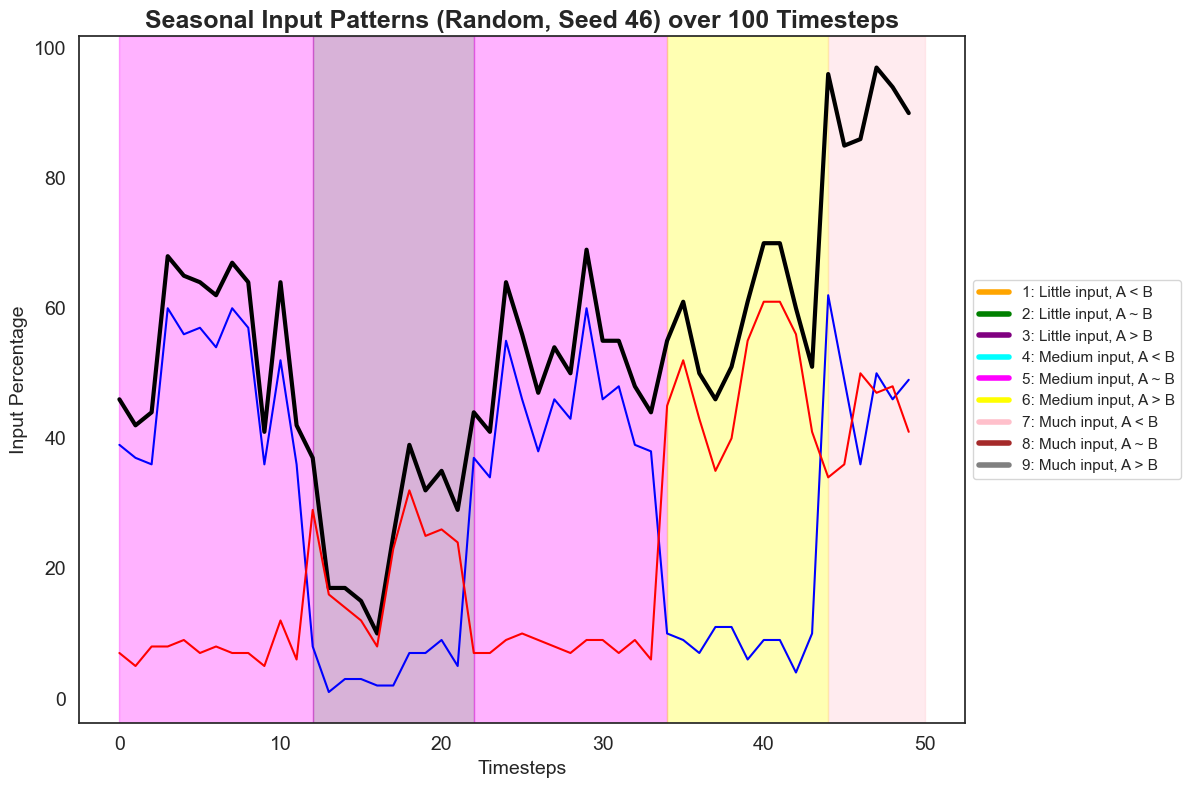

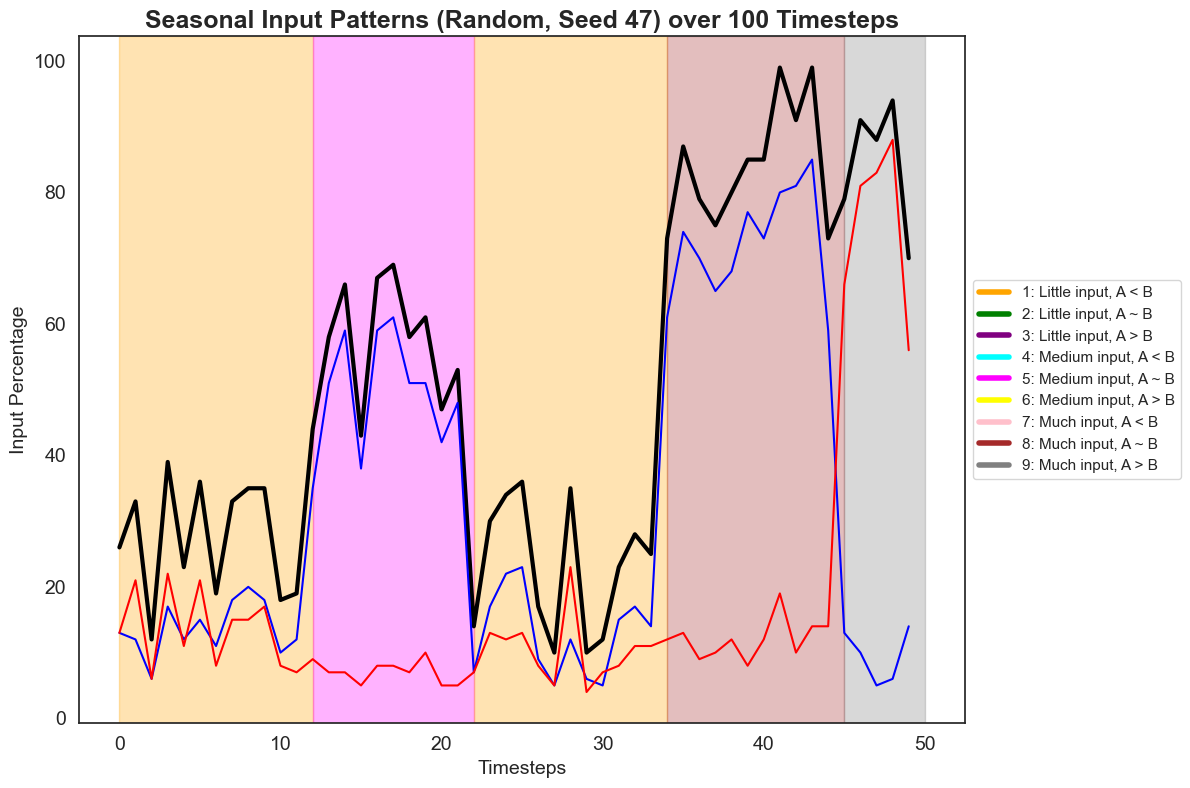

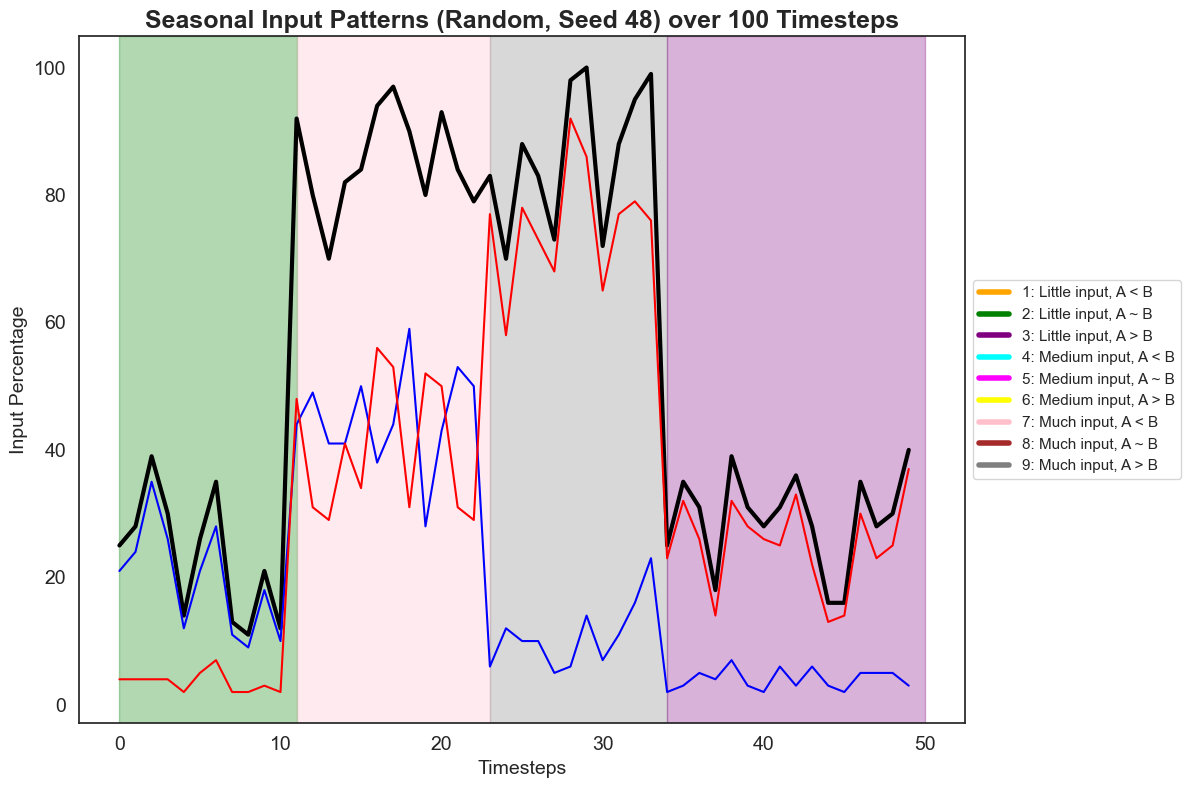

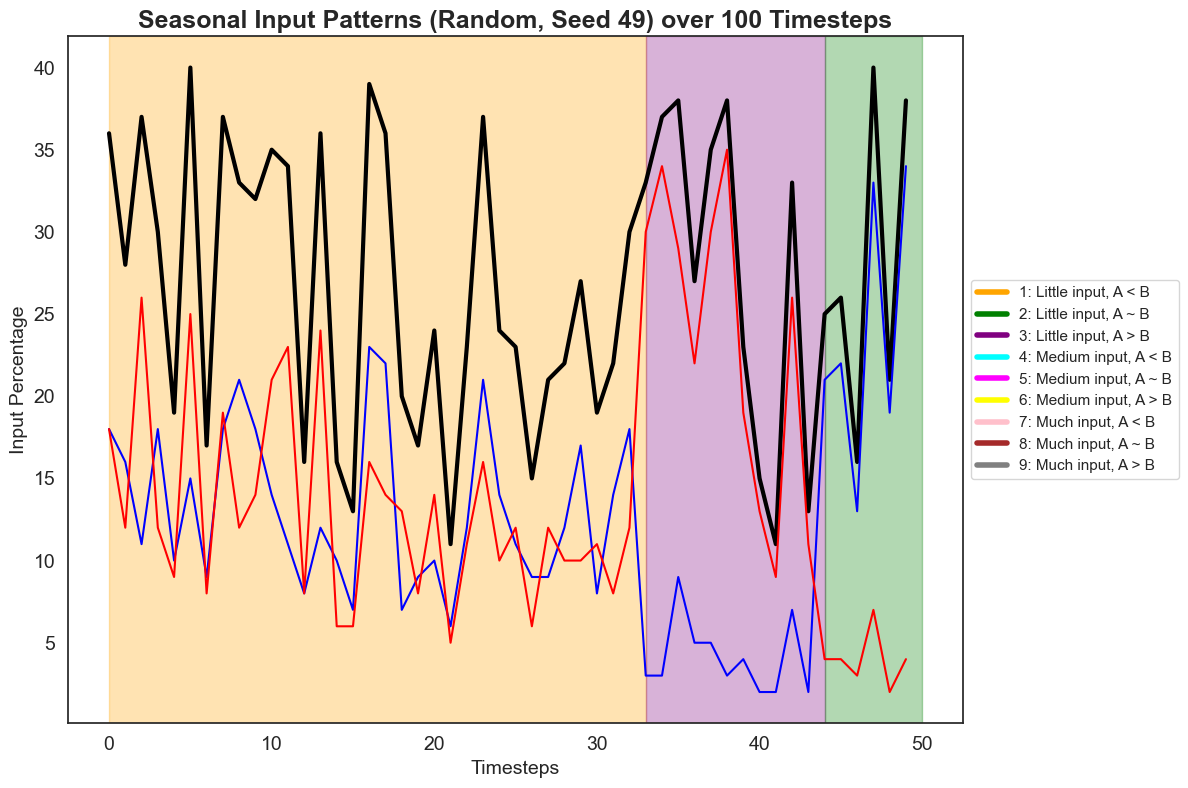

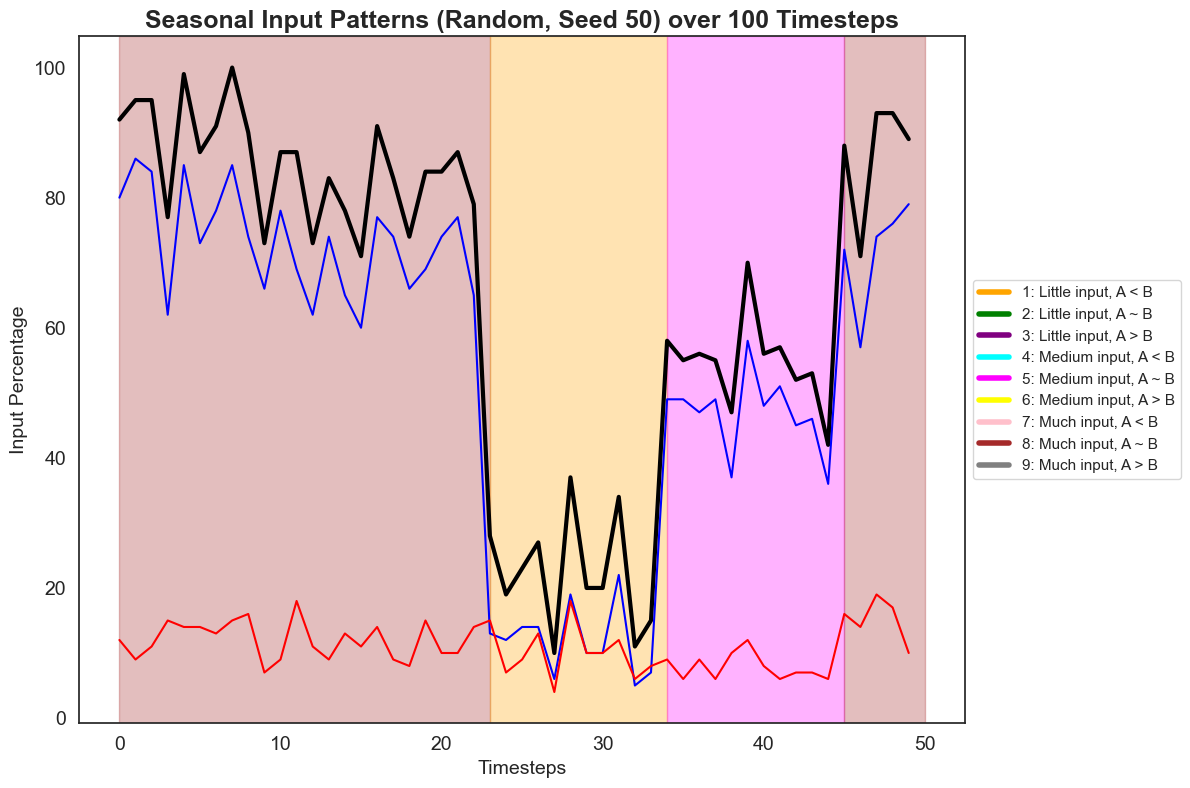

'\n\n'

In [ ]:
# ---------------------------------------------------------*\
# Title: Saisonal Inputs (Overview)
# Author: TM 2024
# ---------------------------------------------------------*/
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns

# ---------------------------------------------------------*/
# Random Input Generator
# ---------------------------------------------------------*/

class RandomInputGenerator:
    """Generate random input for the sorting system."""

    def __init__(self, seed=None):
        self.rng = np.random.default_rng(seed)
        self.seed = seed
        print("Set seed to: ", seed)

    def set_seed(self, seed):
        self.seed = seed
        self.rng = np.random.default_rng(seed)

    def generate_input(self):
        """Generate random amount and distribution of input material"""
        total = self.rng.integers(30, 101)
        a = self.rng.integers(0, total + 1)
        b = total - a
        total = total / 100
        return (a, b, total, 0)

    def plot_random_input_distribution(self, num_samples=50):
        a_values = []
        b_values = []
        total_values = []

        for _ in range(num_samples):
            a, b, total, _ = self.generate_input()
            a_values.append(a)
            b_values.append(b)
            total_values.append(total * 100)  # Scale total back to original range for plotting

        plt.figure(figsize=(10, 6))
        plt.plot(range(num_samples), a_values, label='a values', marker='o')
        plt.plot(range(num_samples), b_values, label='b values', marker='o')
        plt.plot(range(num_samples), total_values, label='total values', marker='o')
        plt.title('Generated Input Values Over Samples')
        plt.xlabel('Sample Index')
        plt.ylabel('Values')
        plt.legend()
        plt.grid(True)
        plt.show()

# ---------------------------------------------------------*/
# Simple Seasonal Input Generator (3 Patterns)
# ---------------------------------------------------------*/


class SimpleSeasonalInputGenerator:
    """Generate simple seasonal input patterns for the sorting system."""

    def __init__(self, seed=None):
        self.patterns = ["Little Input", "Medium Input", "Much Input"]
        self.seed = seed
        self.rng = np.random.default_rng(seed)
        self.set_seed(seed)

    def set_seed(self, seed):
        self.seed = seed
        self.rng = np.random.default_rng(seed)
        self.select_pattern()

    def select_pattern(self) -> bool:
        """Select a random pattern and set the pattern length and step to 0."""
        self.current_pattern = self.rng.choice(self.patterns)
        self.current_pattern_length = self.rng.integers(10, 13)
        self.current_step_in_pattern = 0
        return True

    def _calculate_total_input(self, pattern: str) -> int:
        """Calculate the total input based on the pattern."""
        if pattern == "Much Input":
            return self.rng.integers(66, 101)
        elif pattern == "Little Input":
            return self.rng.integers(10, 34)
        elif pattern == "Medium Input":
            return self.rng.integers(33, 67)

    def generate_input(self):
        """Generate input values for A, B, and the total input percentage."""
        if self.current_step_in_pattern >= self.current_pattern_length:
            self.select_pattern()

        self.current_step_in_pattern += 1

        total_input = round(self._calculate_total_input(self.current_pattern), 2)
        a_input = self.rng.integers(0, total_input + 1)  # Randomly assign A input
        b_input = total_input - a_input  # Calculate B input based on A input
        total_input = round((total_input / 100), 2)  # Scale total input to range [0, 1]

        return a_input, b_input, total_input, self.current_pattern

    def sample(self):
        """Generate a single input sample."""
        if self.current_step_in_pattern >= self.current_pattern_length:
            self.select_pattern()
        return self.generate_input()

    def plot_seasonal_inputs(self):
        """Plot the seasonal input patterns over time."""
        samples = []
        for pattern in self.patterns:
            self.current_pattern = pattern
            self.current_pattern_length = 15
            self.current_step_in_pattern = 0
            for _ in range(15):  # Fixed length of 15 timesteps per pattern
                sample = self.generate_input()
                samples.append(sample)
        self.plot_inputs(samples, 'Simple Seasonal Input Patterns Over Time')

    def plot_random_patterns(self, steps=100):
        """Plot random seasonal input patterns over a fixed number of timesteps."""

        self.set_seed(self.seed)  # Ensure the seed is set again for consistency
        samples = []
        for _ in range(steps):
            sample = self.sample()
            samples.append(sample)
        self.plot_inputs(samples, 'Simple Seasonal Input Patterns (Random) over 100 Timesteps')

    def plot_inputs(self, samples, title):
        a_values, b_values, total_values, patterns = zip(*samples)

        total_values = np.array(total_values) * 100

        sns.set_theme()
        sns.set_style("white")
        plt.figure(figsize=(12, 8))
        plt.plot(total_values, label='Total Input (A + B)', color='black', linewidth=3)
        plt.plot(a_values, label='Input A', linestyle='-', color='blue')
        plt.plot(b_values, label='Input B', linestyle='-', color='red')

        colors = ['orange', 'green', 'purple']
        pattern_labels = {
            "Little Input": "Little input",
            "Medium Input": "Medium input",
            "Much Input": "Much input"
        }

        current_start = 0
        current_pattern = patterns[0]
        for i in range(1, len(patterns)):
            if patterns[i] != current_pattern:
                plt.axvspan(current_start, i, color=colors[self.patterns.index(current_pattern)], alpha=0.3)
                current_start = i
                current_pattern = patterns[i]
        plt.axvspan(current_start, len(patterns), color=colors[self.patterns.index(current_pattern)], alpha=0.3)

        custom_lines = [plt.Line2D([0], [0], color=colors[i], lw=4) for i in range(3)]
        plt.legend(custom_lines, [pattern_labels[pattern] for pattern in self.patterns],
                   loc='center left', bbox_to_anchor=(1, 0.5))

        plt.xlabel('Timesteps', fontsize=14)
        plt.ylabel('Input Percentage', fontsize=14)
        plt.title(title, fontsize=18, fontweight='bold')
        plt.tight_layout()  # Adjust layout to make room for the legend
        plt.xticks(fontsize=14)
        plt.yticks(fontsize=14)
        plt.show()

# ---------------------------------------------------------*/
# Seasonal Input Generator (9 Patterns)
# ---------------------------------------------------------*/


class SeasonalInputGenerator:
    """Generate seasonal input patterns for the sorting system."""

    def __init__(self, seed=None):
        self.patterns = list(range(1, 10))
        self.seed = seed
        self.rng = np.random.default_rng(seed)
        self.set_seed(seed)

    def set_seed(self, seed):
        self.seed = seed
        self.rng = np.random.default_rng(seed)
        self.select_pattern()

    def select_pattern(self) -> bool:
        """Select a random pattern and set the pattern length and step to 0."""
        self.current_pattern = self.rng.choice(self.patterns)
        self.current_pattern_length = self.rng.integers(10, 13)
        self.current_step_in_pattern = 0
        return True

    def _calculate_total_input(self, pattern: int) -> int:
        """Calculate the total input based on the pattern."""
        if pattern in [7, 8, 9]:
            return self.rng.integers(70, 101)
        elif pattern in [1, 2, 3]:
            return self.rng.integers(10, 41)
        elif pattern in [4, 5, 6]:
            return self.rng.integers(40, 71)

    def _calculate_ratio(self, pattern: int):
        """Calculate the ratios of input A and B based on the pattern."""
        if pattern in [1, 4, 7]:
            # Ratio should be >= 1/3 and <= 3
            a_ratio = self.rng.uniform(0.4, 2)
        elif pattern in [2, 5, 8]:
            # Ratio should be >= 3
            a_ratio = self.rng.uniform(4, 10)  # Assumed upper bound to maintain a realistic ratio
        elif pattern in [3, 6, 9]:
            # Ratio should be <= 1/3
            a_ratio = self.rng.uniform(0.05, 0.3)
        a_ratio = round(a_ratio, 2)
        return a_ratio

    def generate_input(self):
        """Generate input values for A, B, and the total input percentage."""
        if self.current_step_in_pattern >= self.current_pattern_length:
            self.select_pattern()

        # print("\nInput: Current Pattern:", self.current_pattern, "Current Step:", self.current_step_in_pattern)
        self.current_step_in_pattern += 1
        total_input = self._calculate_total_input(self.current_pattern)
        a_ratio = self._calculate_ratio(self.current_pattern)

        # Ensure a_ratio is never zero
        if a_ratio == 0:
            a_ratio = 0.01

        # Calculate the input values for A and B based on the ratio
        if a_ratio >= 1:  # if a_ratio is the ratio A/B
            a_input = int(total_input / (1 + 1/a_ratio))
            b_input = total_input - a_input
        else:  # if a_ratio is the ratio B/A
            b_input = int(total_input / (1 + a_ratio))
            a_input = total_input - b_input

        total_input = round((total_input / 100), 2)

        # print ("Total Input: ", total_input)
        # print("A Input: ", a_input)
        # print("B Input: ", b_input)
        # print("Ratio of Inputs: ", a_input / (b_input + 0.1e-10))

        return a_input, b_input, total_input, self.current_pattern

    def sample(self):
        """Generate a single input sample."""
        if self.current_step_in_pattern >= self.current_pattern_length:
            self.select_pattern()
        return self.generate_input()

    def plot_seasonal_inputs(self):
        """Plot the seasonal input patterns over time."""
        samples = []
        for pattern in self.patterns:
            self.current_pattern = pattern
            self.current_pattern_length = 15
            self.current_step_in_pattern = 0
            for _ in range(15):  # Fixed length of 15 timesteps per pattern
                sample = self.generate_input()
                samples.append(sample)
        self.plot_inputs(samples, 'Seasonal Input Patterns Over Time (All Patterns 1-9)')

    def plot_random_patterns(self, steps=100):
        """Plot random seasonal input patterns over a fixed number of timesteps."""

        self.set_seed(self.seed)  # Ensure the seed is set again for consistency
        samples = []
        for _ in range(steps):
            sample = self.sample()
            samples.append(sample)
        self.plot_inputs(samples, f'Seasonal Input Patterns (Random, Seed {self.seed}) over 100 Timesteps')

    def plot_inputs(self, samples, title):
        a_values, b_values, total_values, patterns = zip(*samples)

        total_values = np.array(total_values) * 100

        sns.set_theme()
        sns.set_style("white")
        plt.figure(figsize=(12, 8))
        plt.plot(total_values, label='Total Input (A + B)', color='black', linewidth=3)
        plt.plot(a_values, label='Input A', linestyle='-', color='blue')
        plt.plot(b_values, label='Input B', linestyle='-', color='red')

        colors = ['orange', 'green', 'purple', 'cyan', 'magenta', 'yellow', 'pink', 'brown', 'gray']
        pattern_labels = {
            1: "Little input, A < B",
            2: "Little input, A ~ B",
            3: "Little input, A > B",
            4: "Medium input, A < B",
            5: "Medium input, A ~ B",
            6: "Medium input, A > B",
            7: "Much input, A < B",
            8: "Much input, A ~ B",
            9: "Much input, A > B"
        }

        current_start = 0
        current_pattern = patterns[0]
        for i in range(1, len(patterns)):
            if patterns[i] != current_pattern:
                plt.axvspan(current_start, i, color=colors[current_pattern-1], alpha=0.3)
                current_start = i
                current_pattern = patterns[i]
        plt.axvspan(current_start, len(patterns), color=colors[current_pattern-1], alpha=0.3)

        custom_lines = [plt.Line2D([0], [0], color=colors[i], lw=4) for i in range(9)]
        plt.legend(custom_lines, [f"{i + 1}: {pattern_labels[i + 1]}" for i in range(9)],
                   loc='center left', bbox_to_anchor=(1, 0.5))

        plt.xlabel('Timesteps', fontsize=14)
        plt.ylabel('Input Percentage', fontsize=14)
        plt.title(title, fontsize=18, fontweight='bold')
        plt.tight_layout()  # Adjust layout to make room for the legend
        plt.xticks(fontsize=14)
        plt.yticks(fontsize=14)
        plt.show()

# ---------------------------------------------------------*/
# Main
# ---------------------------------------------------------*/

if __name__ == "__main__":

    RANDOM = 0
    SIMPLE = 0
    SEASONAL = 1

    if RANDOM:
        random_generator = RandomInputGenerator(seed=42)
        random_generator.plot_random_input_distribution(num_samples=50)

    elif SIMPLE:
        # Instantiate the simple seasonal input generator
        simple_generator = SimpleSeasonalInputGenerator(seed=42)
        simple_generator.plot_seasonal_inputs()             # Plot all patterns
        simple_generator.plot_random_patterns(steps=50)     # Plot random patterns over 100 timesteps

    elif SEASONAL:
        generator = SeasonalInputGenerator(seed=42)
        generator.plot_seasonal_inputs()                     # Plot all patterns
        seeds = range(1,51)  # Liste der Seeds
        for seed in seeds:
            # Instantiate the generator
            generator = SeasonalInputGenerator(seed=seed)
            generator.plot_random_patterns(steps=50)     # Plot random patterns over 100 timesteps


# -------------------------Notes-----------------------------------------------*\

# -----------------------------------------------------------------------------*\